# Visualizing the Fair Haven Harbor and New Bedford Point Deployment

Please note that Fairhaven (fh) will be used to refer to the harbor, and New Bedford (nb) will be used to refer to the point.

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.image import NonUniformImage
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import seaborn as sns
from IPython.display import display
from descartes import PolygonPatch
from shapely.geometry import LineString
import shapefile
from scipy.optimize import curve_fit
import sensor_plotting as sp
import GPy as GPy
from scipy.interpolate import griddata, Rbf
import scipy.optimize
from scipy.integrate import quad
from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib inline
%pylab inline

pd.set_option('display.max_columns',None)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['figure.figsize'] = (10,7)

Populating the interactive namespace from numpy and matplotlib


 /home/vpreston/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:pylab import has clobbered these variables: ['griddata']
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
all_data = 'data/clean/all_interpolated.csv'
fh_data = 'data/clean/fh_interpolated.csv'
nb_data = 'data/clean/nb_interpolated.csv'

ctd_geo = 'data/clean/ctd_geo.csv'
gga_geo = 'data/clean/gga_geo.csv'
nit_geo = 'data/clean/nit_geo.csv'
op_geo = 'data/clean/op_geo.csv'
air_geo = 'data/clean/air_geo.csv'

In [3]:
all_df = pd.read_table(all_data, delimiter=',', header=[0,1])
fh_df = pd.read_table(fh_data, delimiter=',', header=[0,1])
nb_df = pd.read_table(nb_data, delimiter=',', header=[0,1])

ctd_df = pd.read_table(ctd_geo, delimiter=',', header=[0,1])
gga_df = pd.read_table(gga_geo, delimiter=',', header=[0,1])
nit_df = pd.read_table(nit_geo, delimiter=',', header=[0,1])
air_df = pd.read_table(air_geo, delimiter=',', header=[0,1])
op_df = pd.read_table(op_geo, delimiter=',', header=[0,1])

 /home/vpreston/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:Columns (0,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
 /home/vpreston/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:Columns (0,18,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
 /home/vpreston/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


## Visualizing [Lat,Lon,Dep,Prop]
For quantities of interest (temperature, salinity, methane, CO2, O2, and nitrate), these plots are 3D representations of the lat, lon, and depth of the measurement. The two sites are shown seperately, for clarity.

In [432]:
def viz_3d(x, y, z, c, label, title, vmin=None, vmax=None):
    if vmin==None:
        vmin = min(c)
    if vmax==None:
        vmax = max(c)
    
    m = plt.figure(figsize=(10,7))
    ax = m.add_subplot(111, projection='3d')
    cmap = plt.cm.viridis
    points = ax.scatter(x,y,z, c=c, s=5, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
#     ax.plot(xs=[41.63118], ys=[-70.90668], zs=[-3], c='r', marker='*', markersize=10)
    cbar = m.colorbar(points)
    cbar.set_label(label)
    m.suptitle(title, fontsize=18)
    ax.set_xlabel('Latitude', fontsize=18)
    ax.set_ylabel('Longitude', fontsize=18)
    ax.set_zlabel('Depth', fontsize=18)

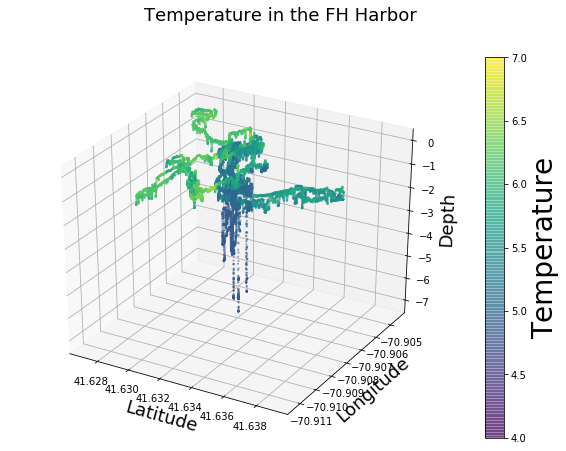

In [433]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature in the FH Harbor'

viz_3d(x, y, z, c, label, title, 4, 7)
plt.show()

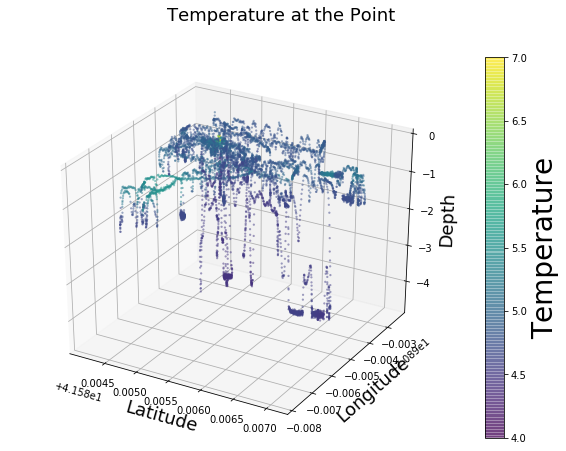

In [6]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature at the Point'

viz_3d(x, y, z, c, label, title, 4, 7)
plt.show()

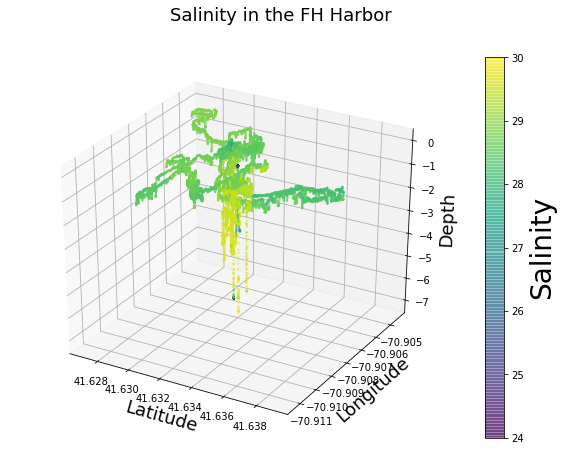

In [7]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity in the FH Harbor'

viz_3d(x, y, z, c, label, title, 24, 30)
plt.show()

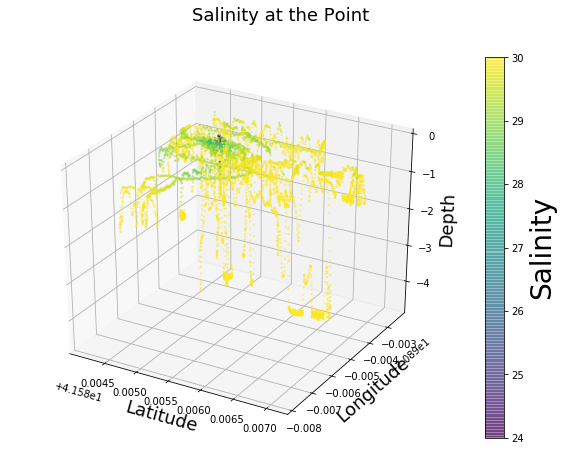

In [8]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity at the Point'

viz_3d(x, y, z, c, label, title, 24, 30)
plt.show()

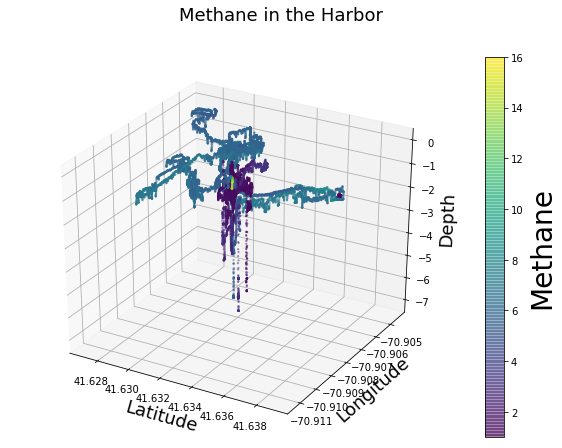

In [9]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['gga']['CH4_ppm_adjusted']
label = 'Methane'
title = 'Methane in the Harbor'

viz_3d(x, y, z, c, label, title, 1, 16)
plt.show()

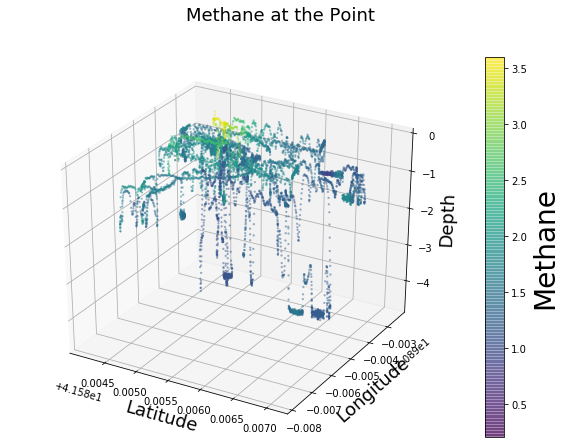

In [10]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['gga']['CH4_ppm_adjusted']
label = 'Methane'
title = 'Methane at the Point'

viz_3d(x, y, z, c, label, title, 0.2, 3.6)
plt.show()

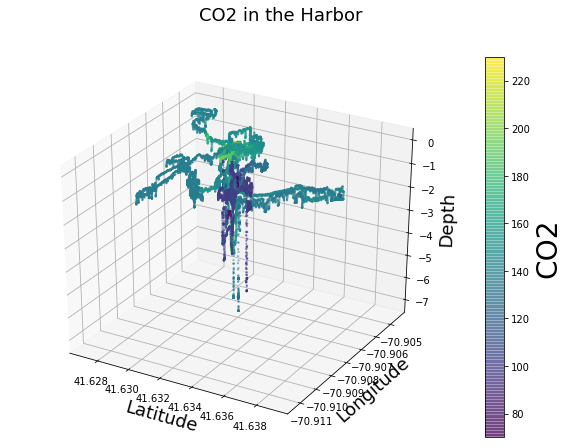

In [11]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 in the Harbor'

viz_3d(x, y, z, c, label, title, 70, 230)
plt.show()

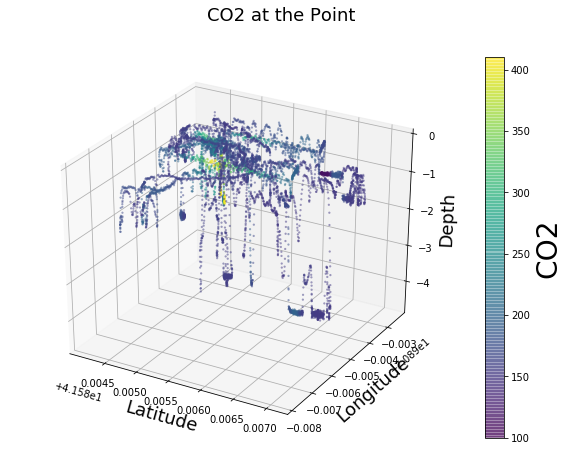

In [12]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 at the Point'

viz_3d(x, y, z, c, label, title, 100, 410)
plt.show()

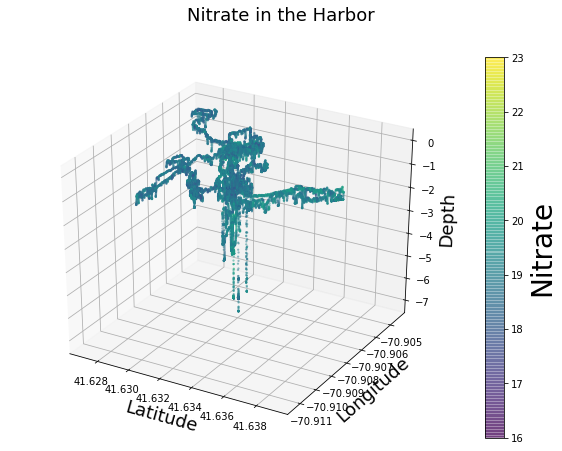

In [27]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['nit']['0.00']
label = 'Nitrate'
title = 'Nitrate in the Harbor'

viz_3d(x, y, z, c, label, title, 16, 23)
plt.show()

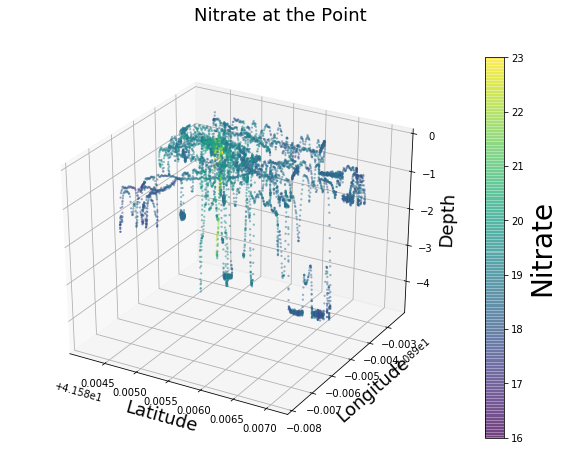

In [28]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['nit']['0.00']
label = 'Nitrate'
title = 'Nitrate at the Point'

viz_3d(x, y, z, c, label, title, 16, 23)
plt.show()

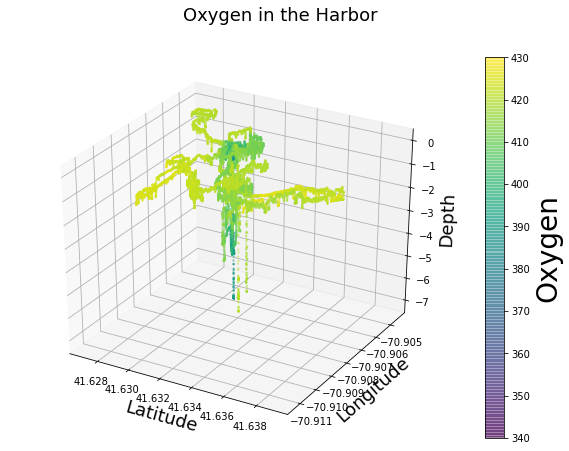

In [43]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['op']['O2Concentration']
label = 'Oxygen'
title = 'Oxygen in the Harbor'

viz_3d(x, y, z, c, label, title, 340, 430)
plt.show()

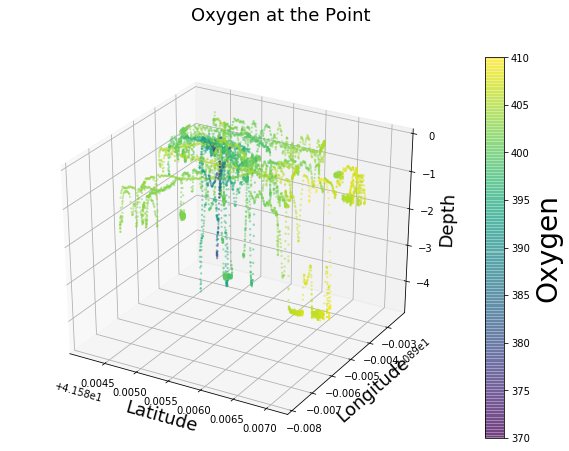

In [36]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['op']['O2Concentration']
label = 'Oxygen'
title = 'Oxygen at the Point'

viz_3d(x, y, z, c, label, title, 370, 410)
plt.show()

## Cross Sections: Long, Lat v Depth
Now, we'll take a look at the cross sections. We will do a similar analysis of the two sites seperately.

In [44]:
def viz_cross(x1, x2, y, c, label, title, vmin=None, vmax=None):
    if vmin==None:
        vmin = min(c)
    if vmax==None:
        vmax = max(c)
    
    fig, ax = plt.subplots(1,2)
    
    cmap = plt.cm.viridis
    plt.suptitle(title, fontsize=18)
    
    points = ax[0].scatter(x1,y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
    ax[0].set_ylabel('Depth', fontsize=18)
    ax[0].set_xlabel('Longitude', fontsize=18)
    
    points = ax[1].scatter(x2,y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
    ax[1].set_xlabel('Latitude', fontsize=18)
    
    cbar = fig.colorbar(points)
    cbar.set_label(label)

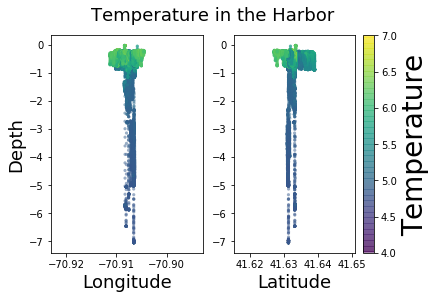

In [45]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature in the Harbor'

viz_cross(x1, x2, y, c, label, title, 4, 7)
plt.show()

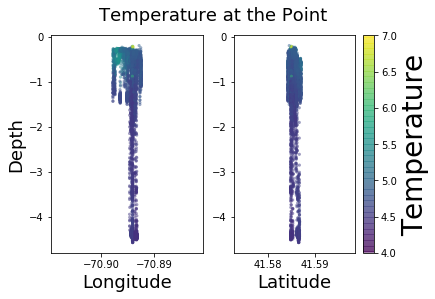

In [46]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature at the Point'

viz_cross(x1, x2, y, c, label, title, 4, 7)
plt.show()

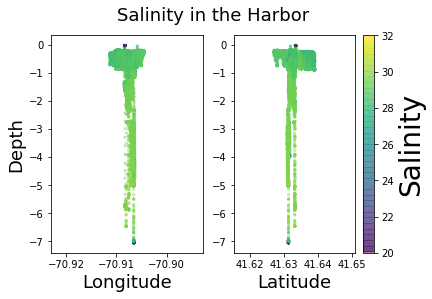

In [47]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity in the Harbor'

viz_cross(x1, x2, y, c, label, title, 20, 32)
plt.show()

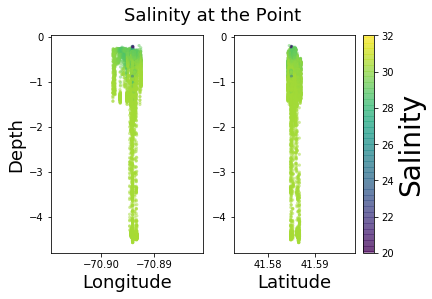

In [48]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity at the Point'

viz_cross(x1, x2, y, c, label, title, 20, 32)
plt.show()

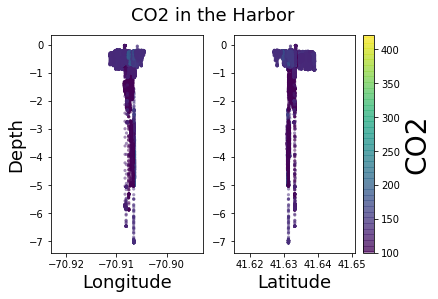

In [49]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 in the Harbor'

viz_cross(x1, x2, y, c, label, title, 100, 420)
plt.show()

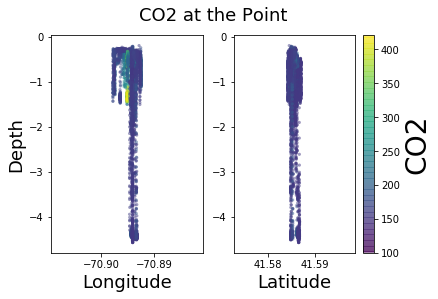

In [50]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 at the Point'

viz_cross(x1, x2, y, c, label, title, 100, 420)
plt.show()

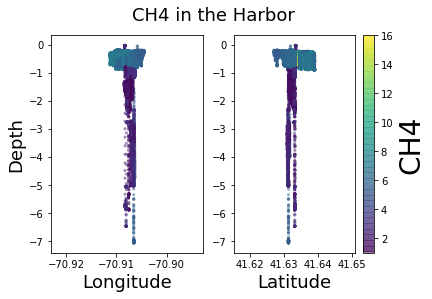

In [51]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['gga']['CH4_ppm_adjusted']
label = 'CH4'
title = 'CH4 in the Harbor'

viz_cross(x1, x2, y, c, label, title, 1, 16)
plt.show()

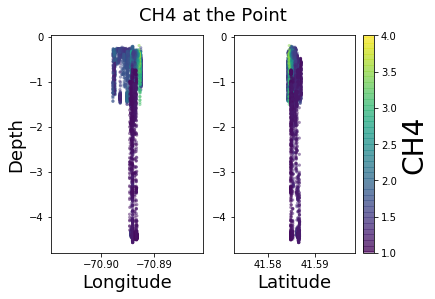

In [52]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['gga']['CH4_ppm_adjusted']
label = 'CH4'
title = 'CH4 at the Point'

viz_cross(x1, x2, y, c, label, title, 1, 4)
plt.show()

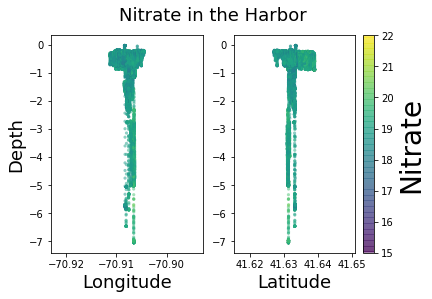

In [57]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['nit']['0.00']
label = 'Nitrate'
title = 'Nitrate in the Harbor'

viz_cross(x1, x2, y, c, label, title, 15, 22)
plt.show()

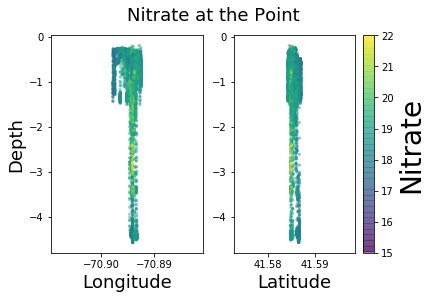

In [56]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['nit']['0.00']
label = 'Nitrate'
title = 'Nitrate at the Point'

viz_cross(x1, x2, y, c, label, title, 15, 22)
plt.show()

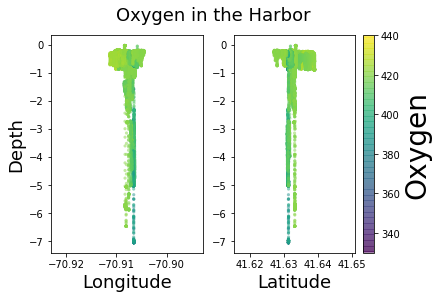

In [61]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['op']['O2Concentration']
label = 'Oxygen'
title = 'Oxygen in the Harbor'

viz_cross(x1, x2, y, c, label, title, 330, 440)
plt.show()

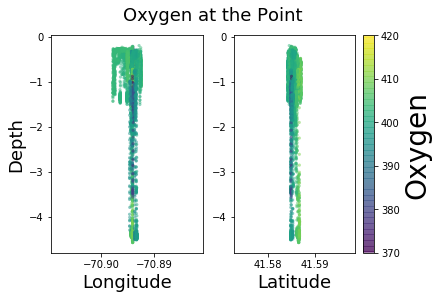

In [58]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['op']['O2Concentration']
label = 'Oxygen'
title = 'Oxygen at the Point'

viz_cross(x1, x2, y, c, label, title, 370, 420)
plt.show()

## Aerial View Cross-Sections
Now, cross sections as though we were looking above. No interpolation. Location of plume is marked. Different layers (marked by half meters) are also plotted.

In [449]:
def viz_top(x1, x2, c, label, title, loc='fh', vmin=None, vmax=None):
    if vmin==None:
        vmin = min(c)
    if vmax==None:
        vmax = max(c)
    
    fig = plt.figure(figsize=(10,7))
    
    cmap = plt.cm.viridis
    plt.suptitle(title, fontsize="18")
    
    points = plt.scatter(x1,x2, c=c, s=10, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
    if loc == 'fh':
        plt.plot(-70.90668, 41.63118, 'r*', markersize=10)
    else:
        plt.plot(-70.89417, 41.58497, 'r*', markersize=10)
    plt.ylabel('Latitude', fontsize=18)
    plt.xlabel('Longitude', fontsize=18)
    
    cbar = fig.colorbar(points)
    cbar.set_label(label)

    
def viz_layers(df, target, scale, label, title, loc='fh', vmin=None, vmax=None):
    if vmin==None:
        vmin = np.nanmin(df[target[0]][target[1]].values)
    if vmax==None:
        vmax = np.nanmax(df[target[0]][target[1]].values)
    
    cmap = plt.cm.viridis
    plt.suptitle(title, fontsize="18")
    
    num_layers = int(np.nanmax(df['ctd']['Depth'].values)/scale)
    fig, ax = plt.subplots(num_layers,1, sharex=True, sharey=True, figsize=(6,num_layers*7))
    
    for i in range(0,num_layers):
        lower = i*scale
        upper = (i+1)*scale
        temp_df = df[(df['ctd']['Depth'] < upper) & (df['ctd']['Depth'] >= lower)]
        points = ax[i].scatter(temp_df['p']['Longitude'], temp_df['p']['Latitude'], c=temp_df[target[0]][target[1]], s=10, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
        ax[i].set_title(str(lower) + " to " + str(upper) + " m", fontsize=18)
        if loc=='fh':
            ax[i].plot(-70.90668, 41.63118, 'r*', markersize=10)
        else:
            ax[i].plot(-70.89417, 41.58497, 'r*', markersize=10)

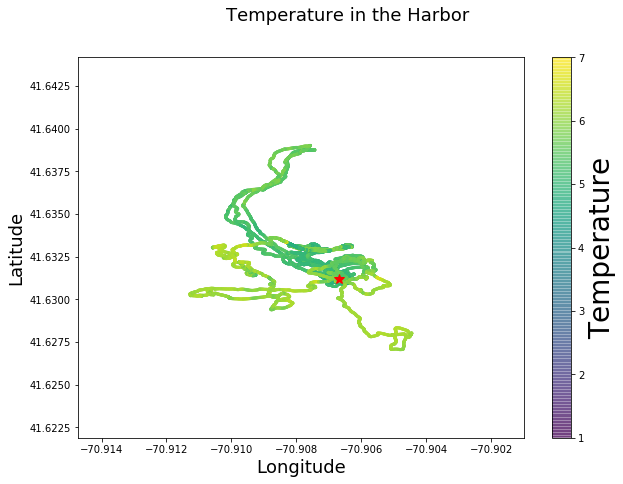

In [450]:
x1 = ctd_df['p']['Longitude'][0:26100]
x2 = ctd_df['p']['Latitude'][0:26100]
c = ctd_df['ctd']['Temperature'][0:26100]
label = 'Temperature'
title = 'Temperature in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 1, 7)
plt.show()

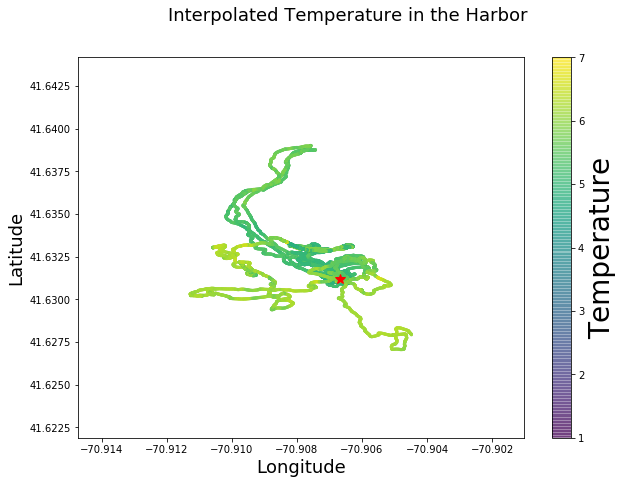

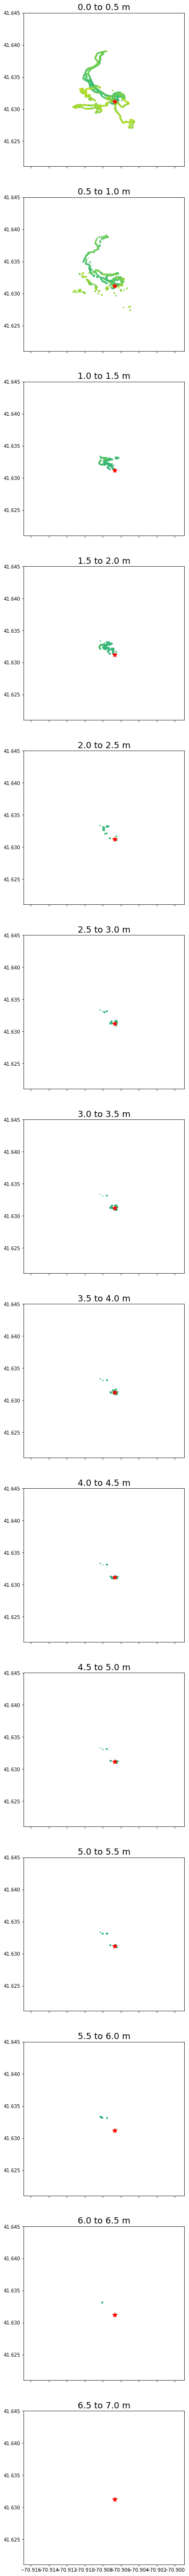

In [451]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
c = fh_df['ctd']['Temperature']
label = 'Temperature'
title = 'Interpolated Temperature in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 1, 7)
viz_layers(fh_df, ['ctd', 'Temperature'], 0.5, label, title, 'fh', 1, 7)
plt.show()

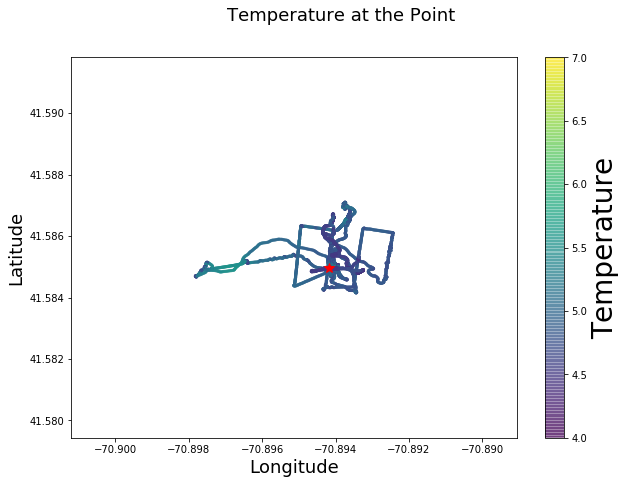

In [452]:
x1 = ctd_df['p']['Longitude'][30245:]
x2 = ctd_df['p']['Latitude'][30245:]
c = ctd_df['ctd']['Temperature'][30245:]
label = 'Temperature'
title = 'Temperature at the Point'

viz_top(x1, x2, c, label, title, 'nb', 4, 7)
plt.show()

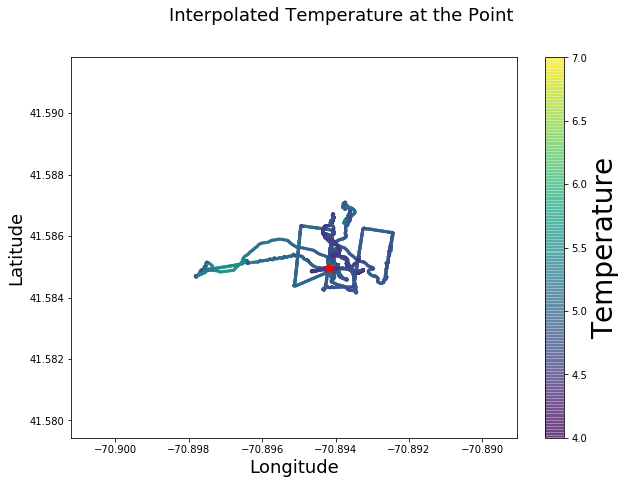

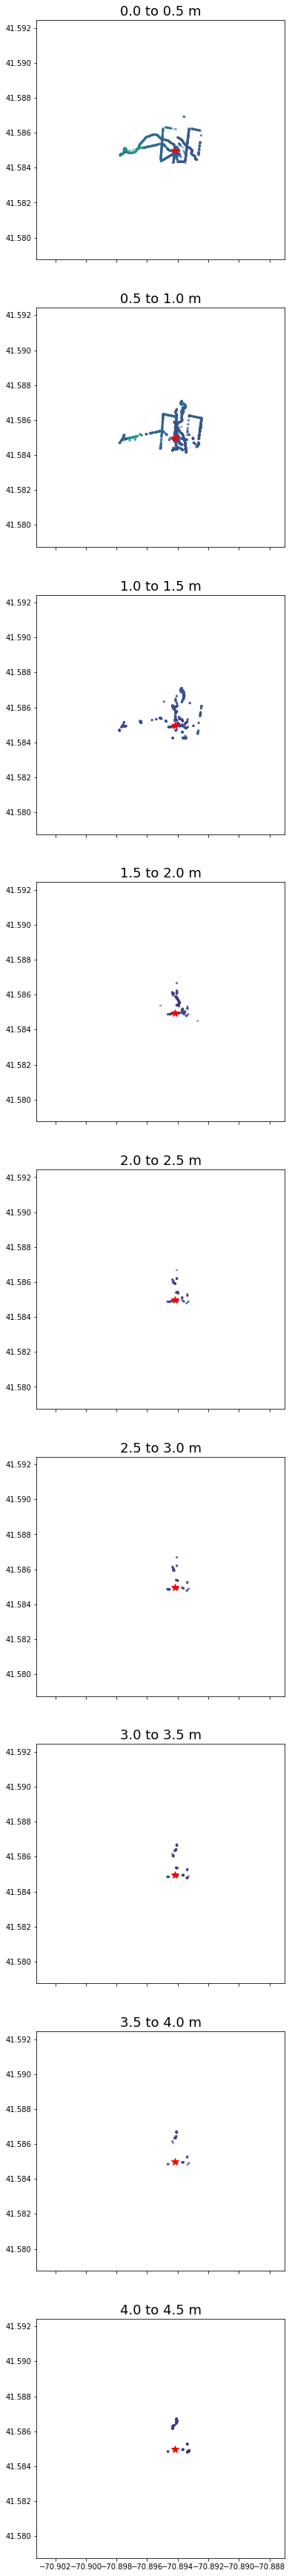

In [455]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
c = nb_df['ctd']['Temperature']
label = 'Temperature'
title = 'Interpolated Temperature at the Point'

viz_top(x1, x2, c, label, title, 'nb', 4, 7)
viz_layers(nb_df, ['ctd', 'Temperature'], 0.5, label, title, 'nb', 4, 7)
plt.show()

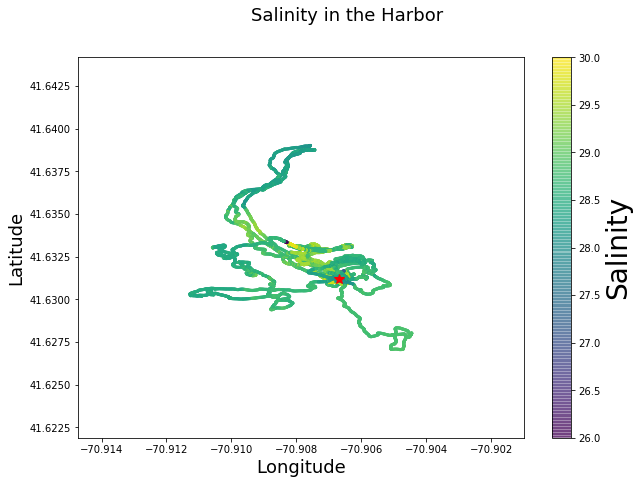

In [456]:
x1 = ctd_df['p']['Longitude'][0:26100]
x2 = ctd_df['p']['Latitude'][0:26100]
c = ctd_df['ctd']['Salinity'][0:26100]
label = 'Salinity'
title = 'Salinity in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 26, 30)
plt.show()

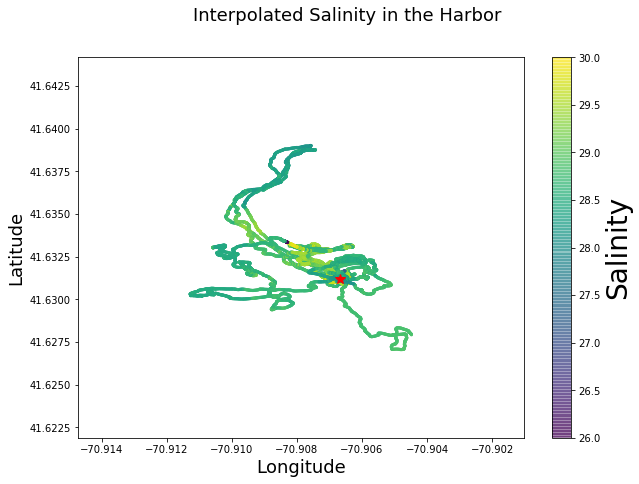

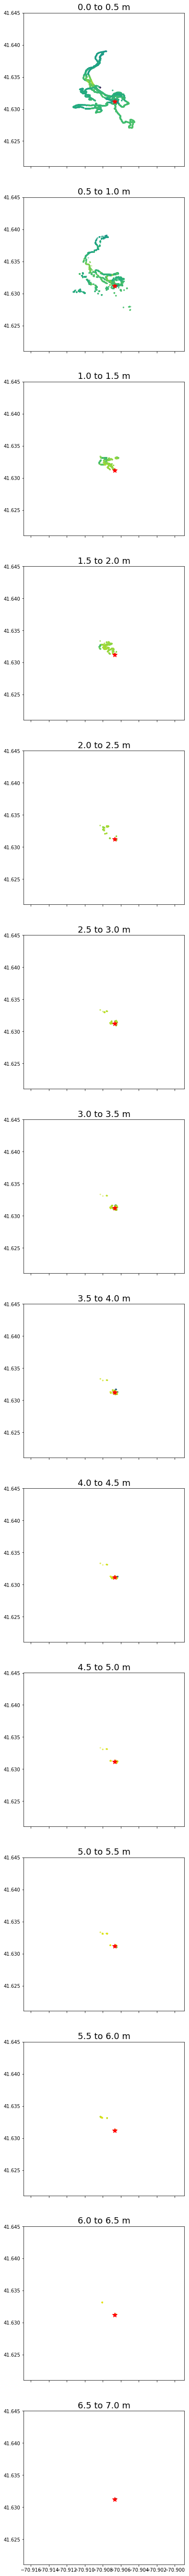

In [457]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
c = fh_df['ctd']['Salinity']
label = 'Salinity'
title = 'Interpolated Salinity in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 26, 30)
viz_layers(fh_df, ['ctd', 'Salinity'], 0.5, label, title, 'fh', 26, 30)
plt.show()

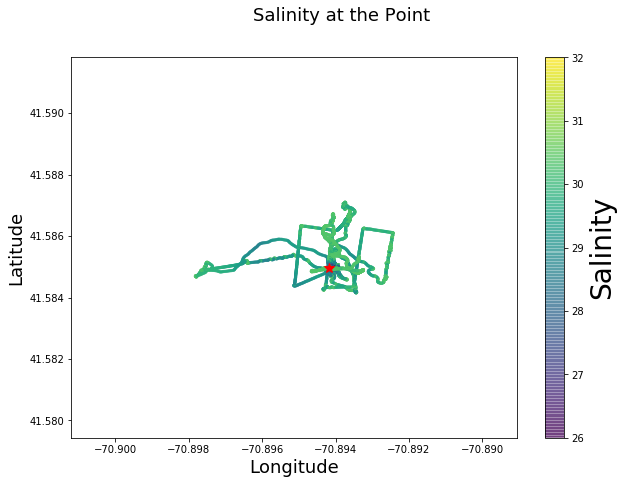

In [459]:
x1 = ctd_df['p']['Longitude'][30245:]
x2 = ctd_df['p']['Latitude'][30245:]
c = ctd_df['ctd']['Salinity'][30245:]
label = 'Salinity'
title = 'Salinity at the Point'

viz_top(x1, x2, c, label, title,'nb', 26, 32)
plt.show()

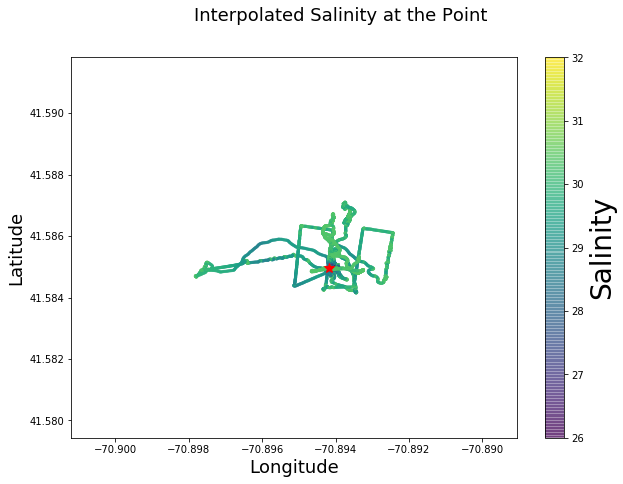

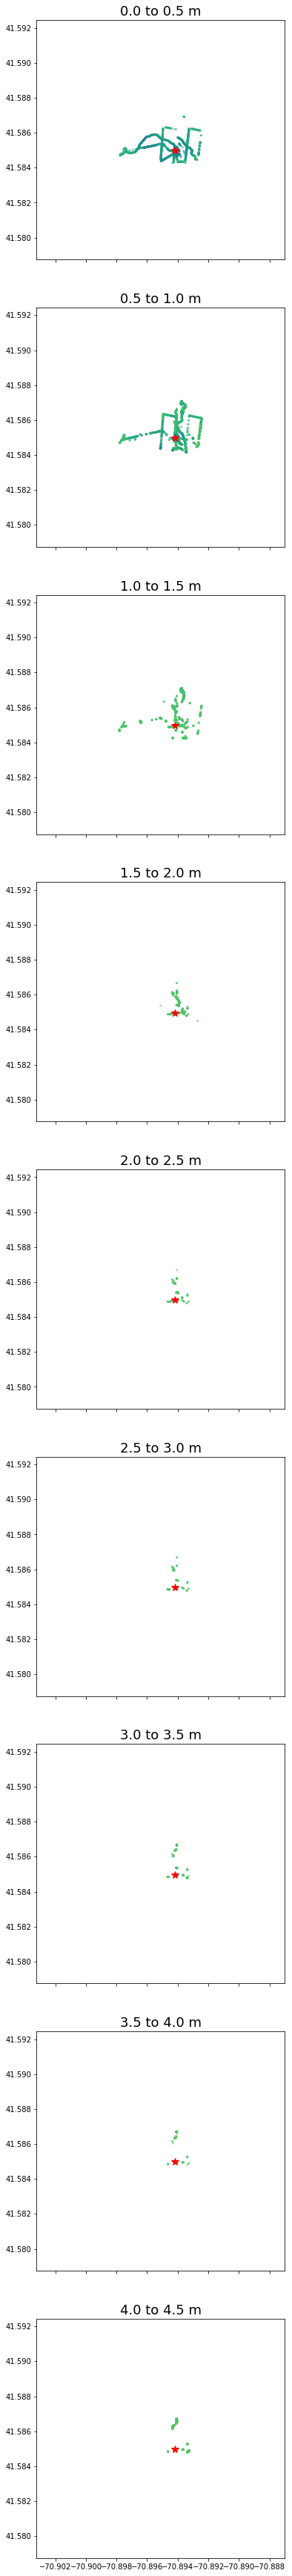

In [460]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
c = nb_df['ctd']['Salinity']
label = 'Salinity'
title = 'Interpolated Salinity at the Point'

viz_top(x1, x2, c, label, title, 'nb', 26, 32)
viz_layers(nb_df, ['ctd', 'Salinity'], 0.5, label, title, 'nb', 26, 32)
plt.show()

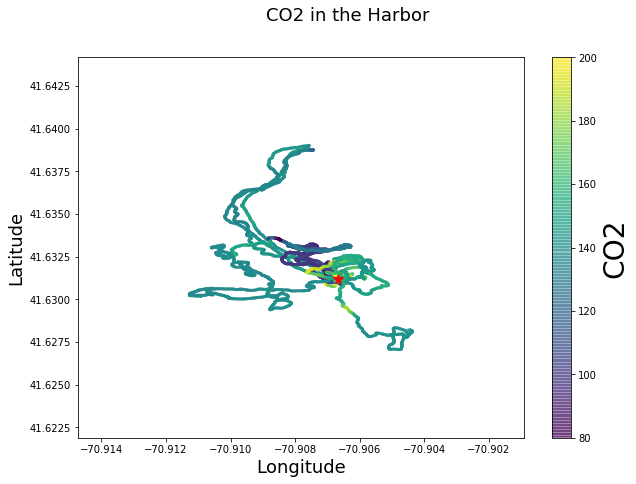

In [461]:
x1 = gga_df['p']['Longitude'][0:13500]
x2 = gga_df['p']['Latitude'][0:13500]
c = gga_df['gga']['CO2_ppm_adjusted'][0:13500]
label = 'CO2'
title = 'CO2 in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 80, 200)
plt.show()

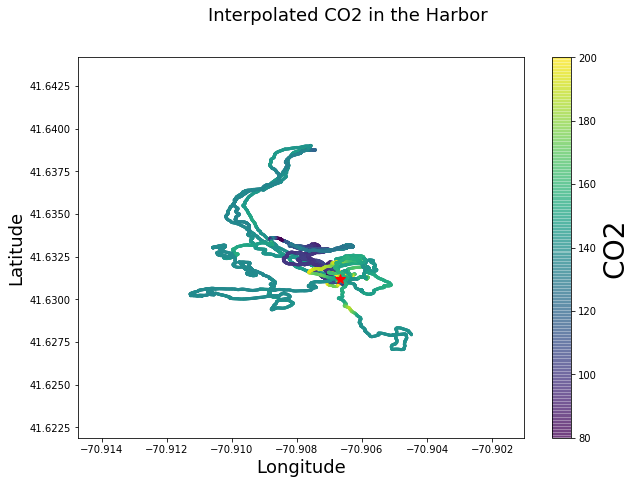

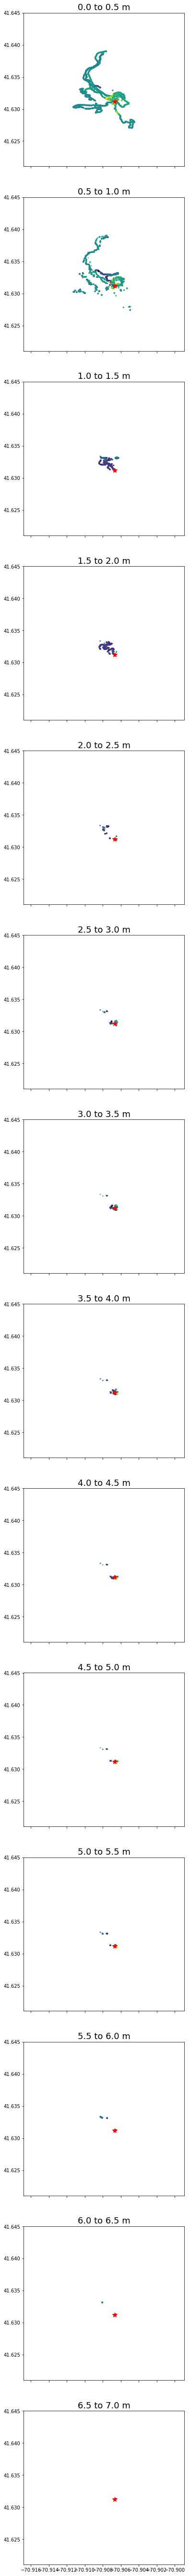

In [462]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
c = fh_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'Interpolated CO2 in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 80, 200)
viz_layers(fh_df, ['gga', 'CO2_ppm_adjusted'], 0.5, label, title, 'fh', 80, 200)
plt.show()

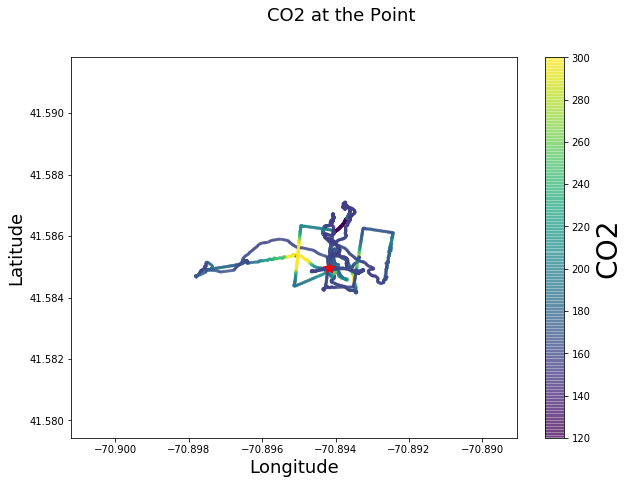

In [463]:
x1 = gga_df['p']['Longitude'][15450:]
x2 = gga_df['p']['Latitude'][15450:]
c = gga_df['gga']['CO2_ppm_adjusted'][15450:]
label = 'CO2'
title = 'CO2 at the Point'

viz_top(x1, x2, c, label, title, 'nb', 120, 300)
plt.show()

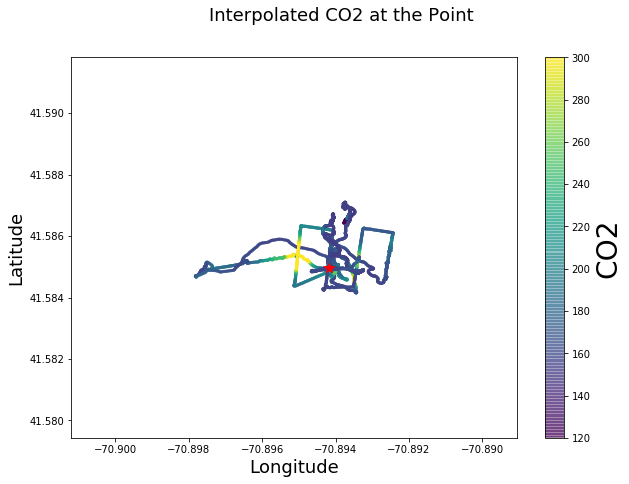

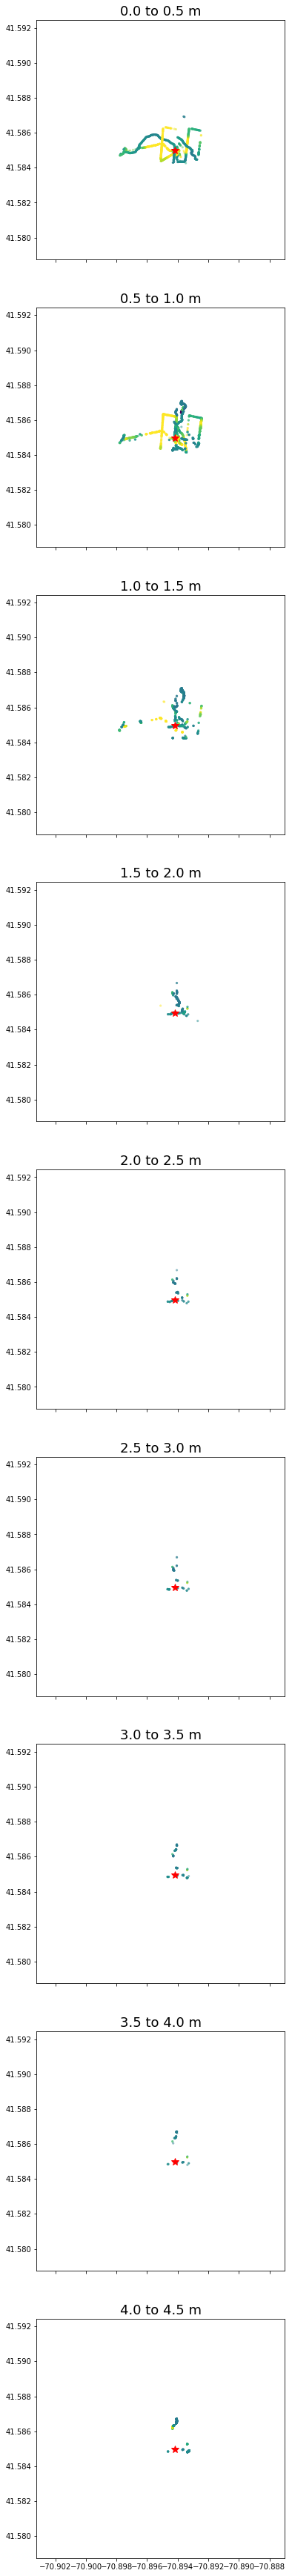

In [464]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
c = nb_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'Interpolated CO2 at the Point'

viz_top(x1, x2, c, label, title, 'nb', 120, 300)
viz_layers(nb_df, ['gga', 'CO2_ppm_adjusted'], 0.5, label, title, 'nb', 120, 200)

plt.show()

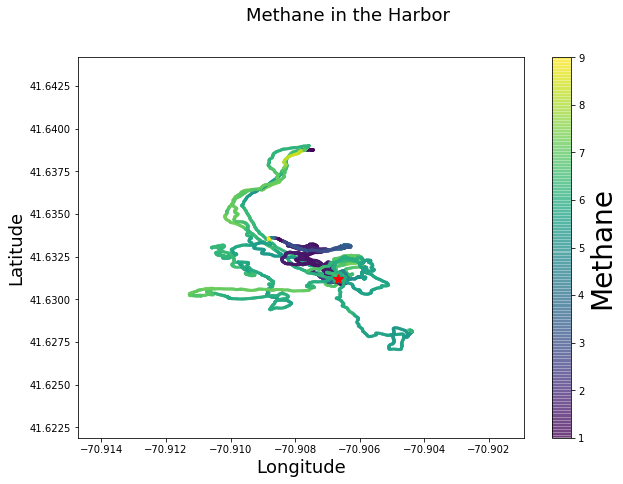

In [465]:
x1 = gga_df['p']['Longitude'][0:13500]
x2 = gga_df['p']['Latitude'][0:13500]
c = gga_df['gga']['CH4_ppm_adjusted'][0:13500]
label = 'Methane'
title = 'Methane in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 1, 9)
plt.show()

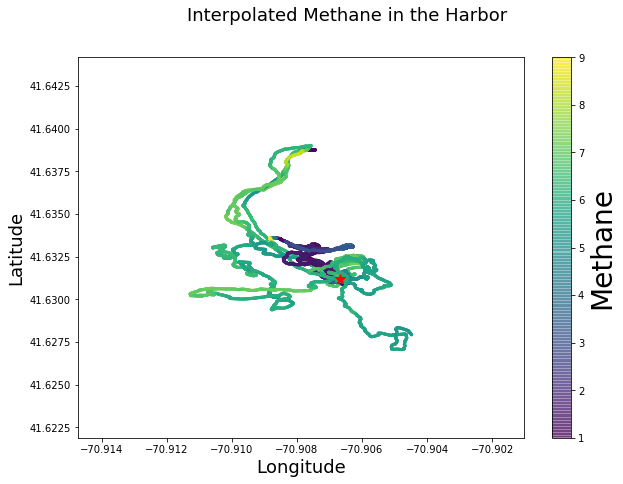

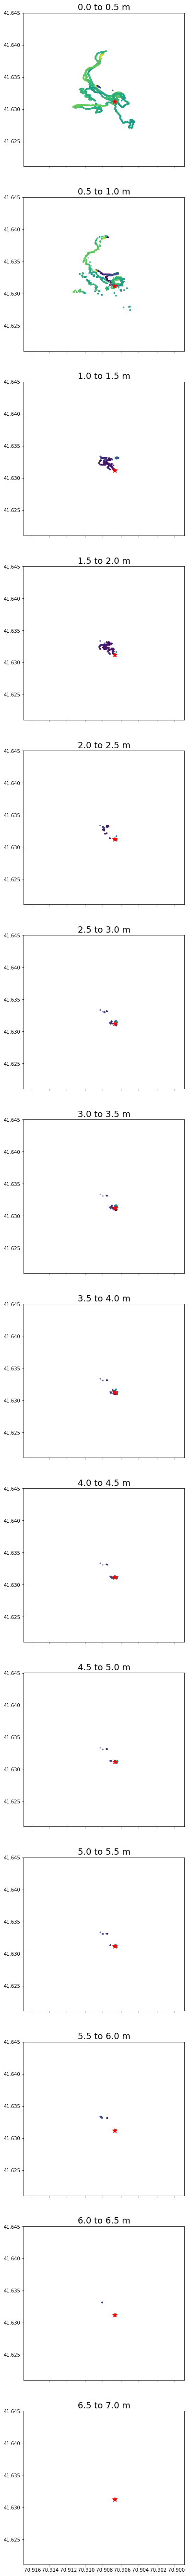

In [466]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
c = fh_df['gga']['CH4_ppm_adjusted']
label = 'Methane'
title = 'Interpolated Methane in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 1, 9)
viz_layers(fh_df, ['gga', 'CH4_ppm_adjusted'], 0.5, label, title, 'fh', 1, 9)
plt.show()

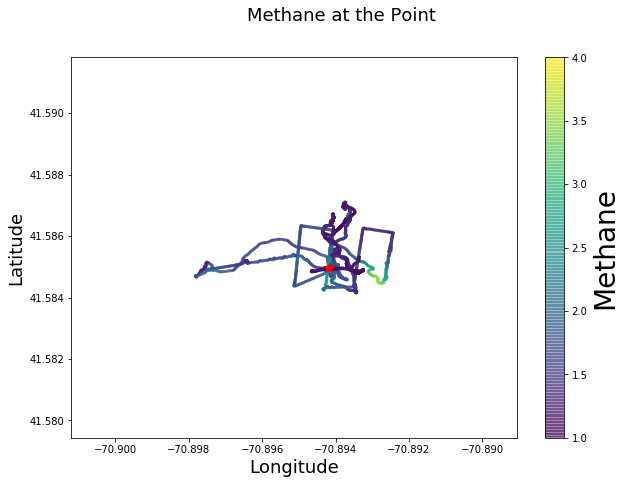

In [467]:
x1 = gga_df['p']['Longitude'][15450:]
x2 = gga_df['p']['Latitude'][15450:]
c = gga_df['gga']['CH4_ppm_adjusted'][15450:]
label = 'Methane'
title = 'Methane at the Point'

viz_top(x1, x2, c, label, title, 'nb', 1, 4)
plt.show()

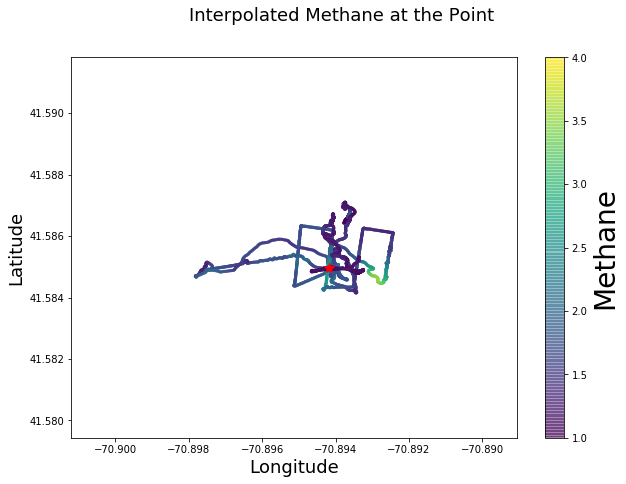

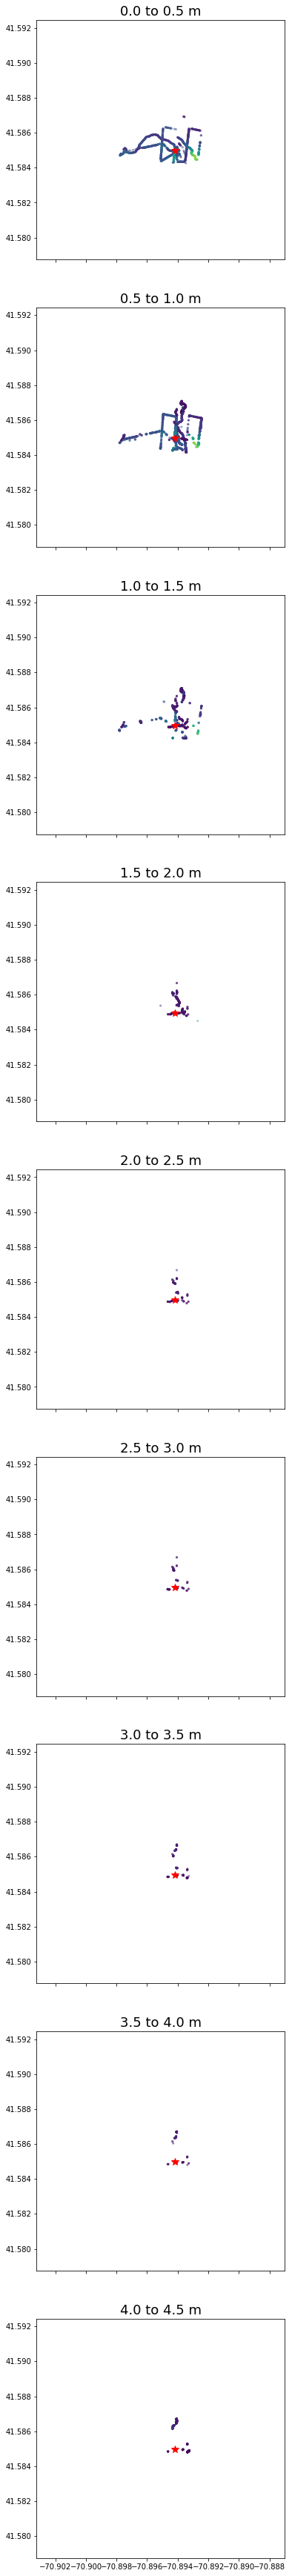

In [468]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
c = nb_df['gga']['CH4_ppm_adjusted']
label = 'Methane'
title = 'Interpolated Methane at the Point'

viz_top(x1, x2, c, label, title, 'nb', 1, 4)
viz_layers(nb_df, ['gga', 'CH4_ppm_adjusted'], 0.5, label, title, 'nb', 1, 4)
plt.show()

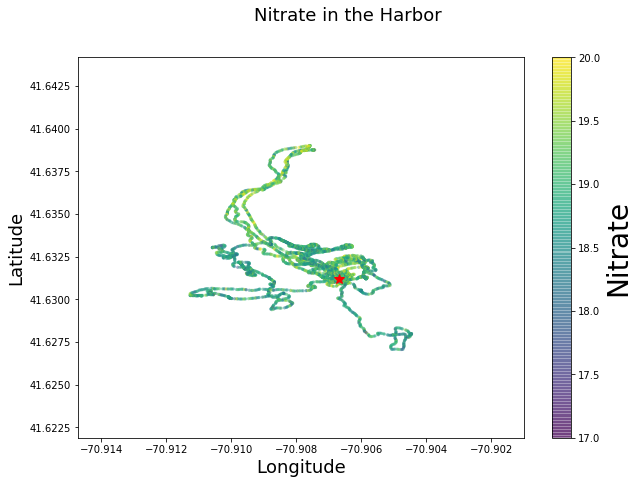

In [469]:
x1 = nit_df['p']['Longitude'][0:4850]
x2 = nit_df['p']['Latitude'][0:4850]
c = nit_df['nit']['0.00'][0:4850]
label = 'Nitrate'
title = 'Nitrate in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 17, 20)
plt.show()

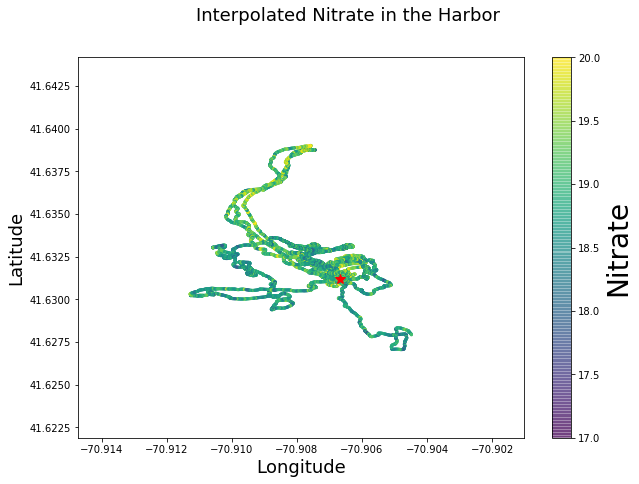

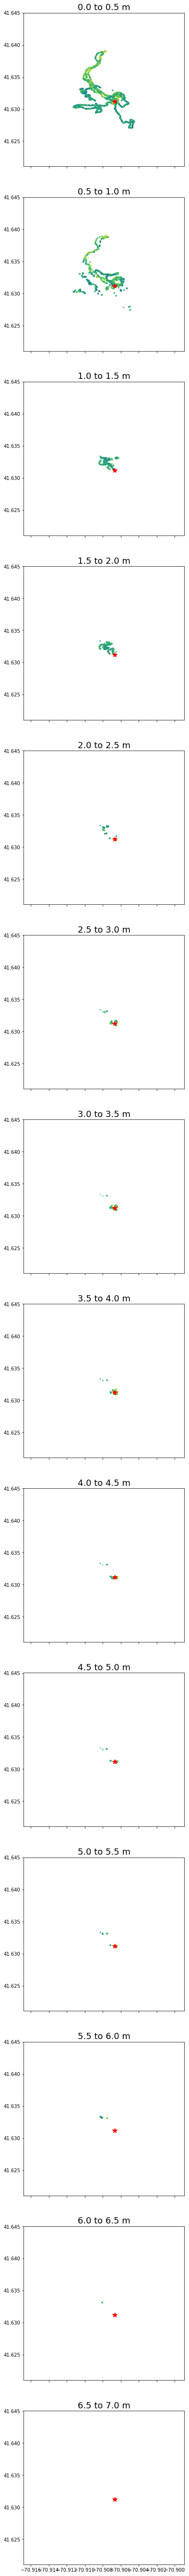

In [470]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
c = fh_df['nit']['0.00']
label = 'Nitrate'
title = 'Interpolated Nitrate in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 17, 20)
viz_layers(fh_df, ['nit', '0.00'], 0.5, label, title, 'fh', 17, 20)
plt.show()

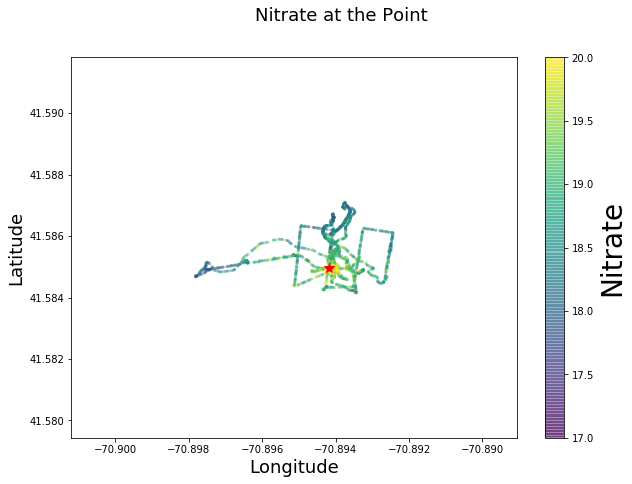

In [471]:
x1 = nit_df['p']['Longitude'][5600:]
x2 = nit_df['p']['Latitude'][5600:]
c = nit_df['nit']['0.00'][5600:]
label = 'Nitrate'
title = 'Nitrate at the Point'

viz_top(x1, x2, c, label, title, 'nb', 17, 20)
plt.show()

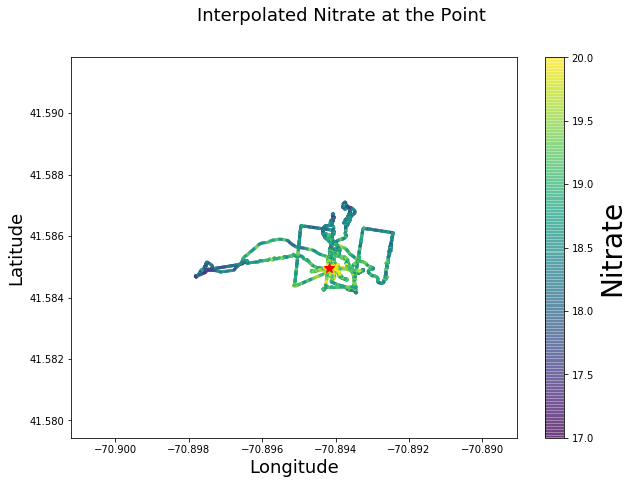

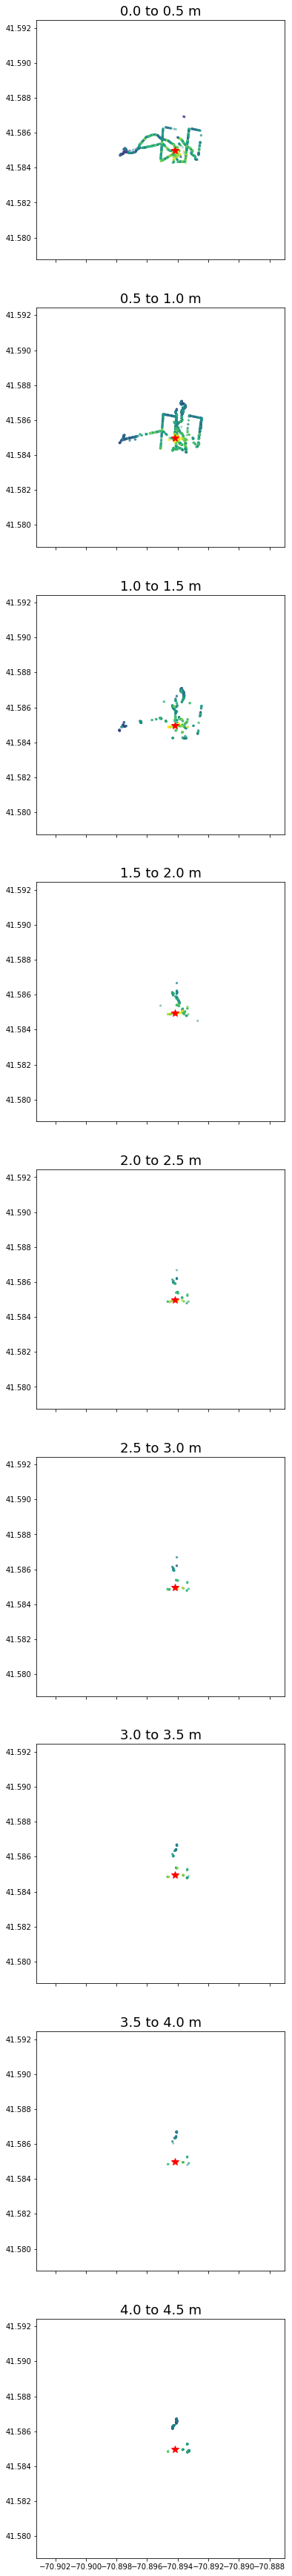

In [472]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
c = nb_df['nit']['0.00']
label = 'Nitrate'
title = 'Interpolated Nitrate at the Point'

viz_top(x1, x2, c, label, title, 'nb', 17, 20)
viz_layers(nb_df, ['nit', '0.00'], 0.5, label, title, 'nb', 17, 20)
plt.show()

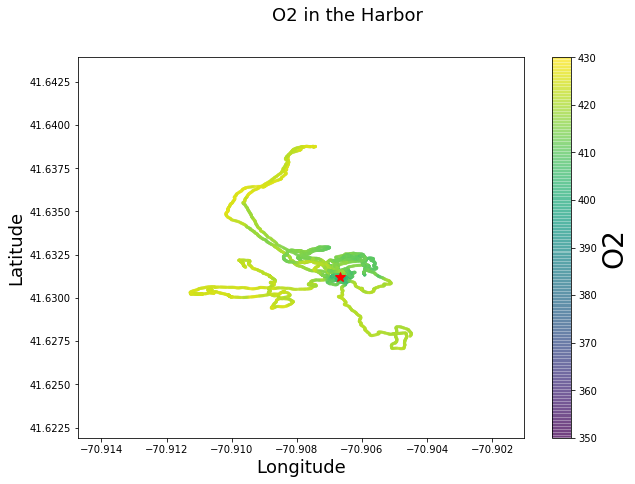

In [473]:
x1 = op_df['p']['Longitude'][0:8077]
x2 = op_df['p']['Latitude'][0:8077]
c = op_df['op']['O2Concentration'][0:8077]
label = 'O2'
title = 'O2 in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 350, 430)
plt.show()

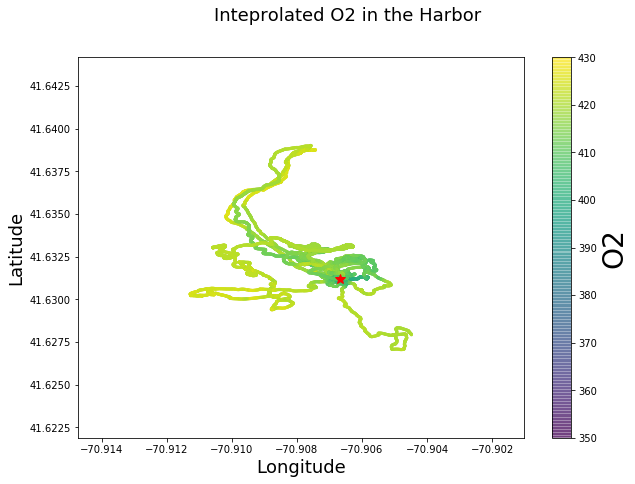

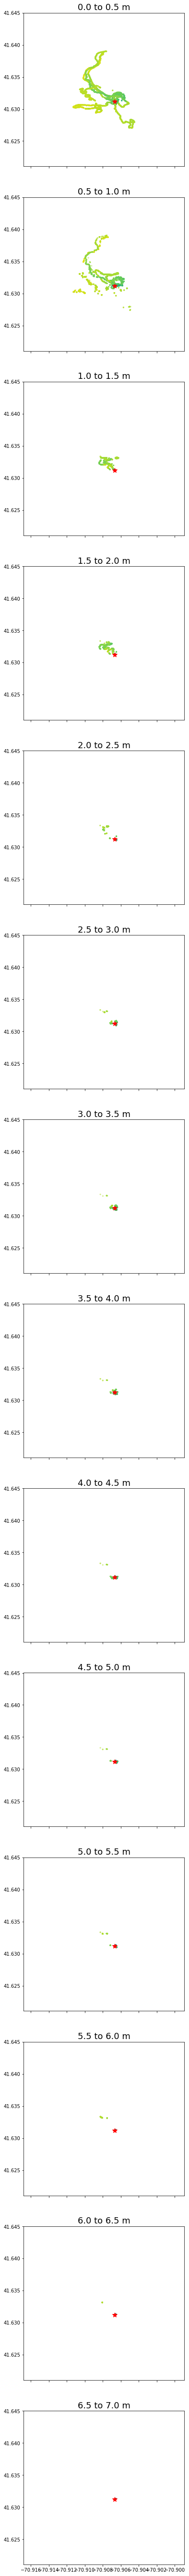

In [474]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
c = fh_df['op']['O2Concentration']
label = 'O2'
title = 'Inteprolated O2 in the Harbor'

viz_top(x1, x2, c, label, title, 'fh', 350, 430)
viz_layers(fh_df, ['op', 'O2Concentration'], 0.5, label, title, 'fh', 350, 430)
plt.show()

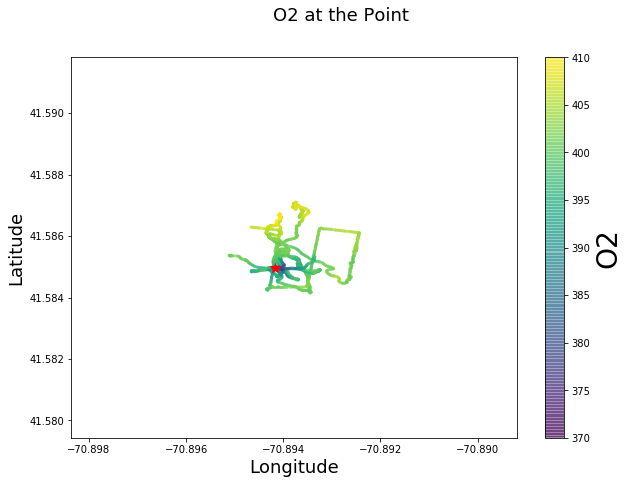

In [476]:
x1 = op_df['p']['Longitude'][8077:]
x2 = op_df['p']['Latitude'][8077:]
c = op_df['op']['O2Concentration'][8077:]
label = 'O2'
title = 'O2 at the Point'

viz_top(x1, x2, c, label, title, 'nb', 370, 410)
plt.show()

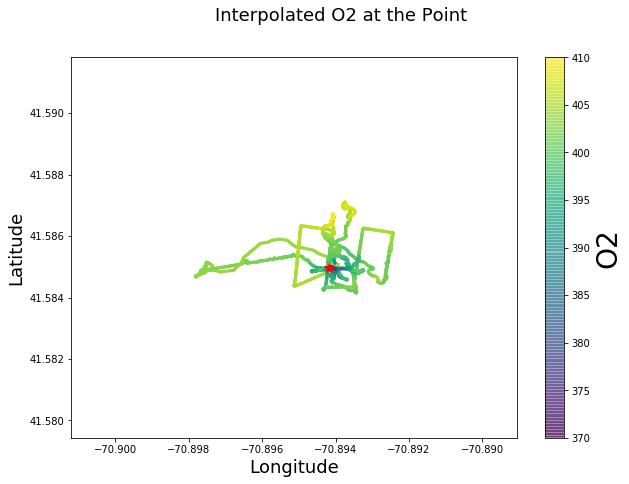

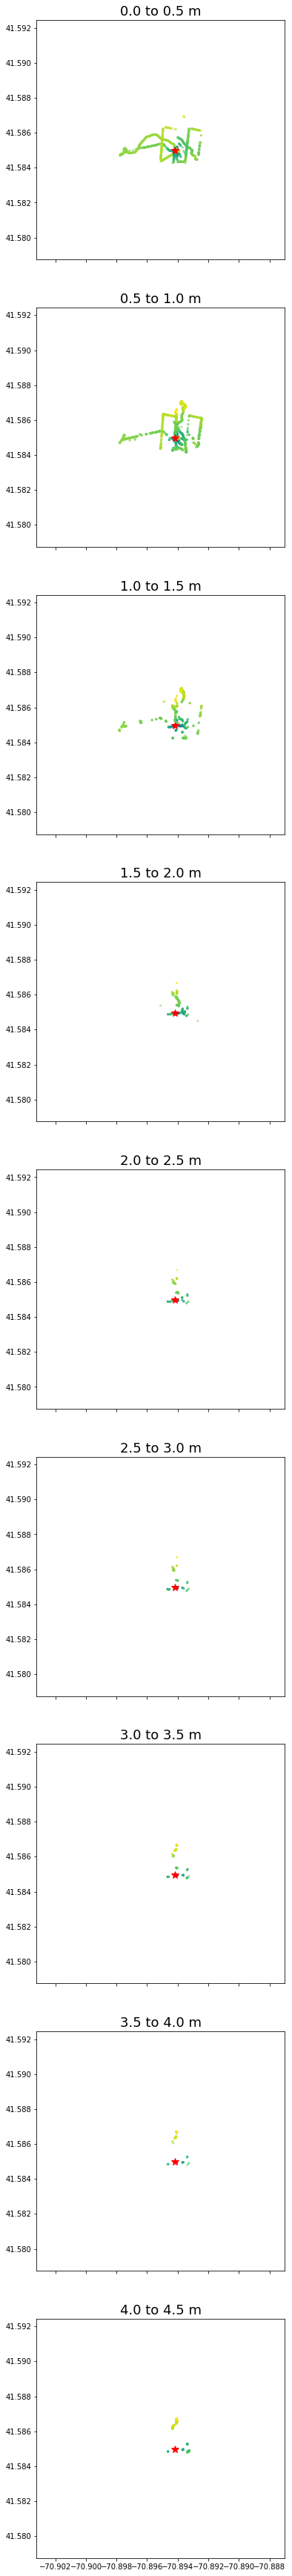

In [477]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
c = nb_df['op']['O2Concentration']
label = 'O2'
title = 'Interpolated O2 at the Point'

viz_top(x1, x2, c, label, title, 'nb', 370, 410)
viz_layers(nb_df, ['op', 'O2Concentration'], 0.5, label, title, 'nb', 370, 410)
plt.show()

## Gaussian Process Estimations
To interpolate the data, we can use a Gaussian Process. Location of the plume upwelling site is marked with a red star.

In [568]:
def viz_gp(df, target, scale, title, loc, vmin, vmax):
    temp = df.loc[df[target[0]].dropna(subset=[target[1]]).index]

    ranges = [np.nanmin(temp['p']['Longitude'].values), 
              np.nanmax(temp['p']['Longitude'].values), 
              np.nanmin(temp['p']['Latitude'].values), 
              np.nanmax(temp['p']['Latitude'].values)]
    
    vmin = np.nanmin(temp[target[0]][target[1]])
    vmax = np.nanmax(temp[target[0]][target[1]])
    
    
    
    num_layers = int(np.nanmax(temp['ctd']['Depth'].values)/scale)
    fig, ax = plt.subplots(num_layers, 1, figsize=(6, num_layers*7))
    for i in range(0, num_layers):
        upper = (i+1)*scale
        lower = i*scale
        t = temp[(temp['ctd']['Depth'] < upper) & (temp['ctd']['Depth'] >= lower)]
        xv = t['p']['Longitude'][:]
        yv = t['p']['Latitude'][:]
        z = t[target[0]][target[1]][:]
        
        points = []
        vals = []
        kern = None

        for x,y,zed in zip(xv, yv, z):
            points.append([x,y])
            vals.append(zed)
        
        if len(points) > 20:
            xvals = np.array(points)
            zvals = np.reshape(np.array(vals), (len(vals), 1))
            print xvals.shape, zvals.shape

            kern = GPy.kern.sde_Matern52(input_dim = 2, lengthscale=0.001, variance=np.var(z))
            mod = GPy.models.GPRegression(xvals, zvals, kern)
            mod.initialize_parameter()
            mod.optimize_restarts(num_restarts = 2, messages = False)
            print kern

            xc = np.linspace(ranges[0], ranges[1], 100)
            yc = np.linspace(ranges[2], ranges[3], 100)
            xc, yc = np.meshgrid(xc, yc, sparse = False, indexing= 'xy')
            data = np.vstack([xc.ravel(), yc.ravel()]).T
            obs, var = mod.predict(data, full_cov=False, include_likelihood=True)

            ax[i].set_xlim(ranges[0:2])
            ax[i].set_ylim(ranges[2:])       
            plot = ax[i].contourf(xc, yc, obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(vmin, vmax, 15), vmin=vmin, vmax=vmax)
            ax[i].scatter(xv, yv, c=z, cmap='viridis', vmin=vmin, vmax=vmax, alpha=0.4)
            if loc == 'fh':
                ax[i].plot(-70.90668, 41.63118, 'r*', markersize=10)
            else:
                ax[i].plot(-70.89417, 41.58497, 'r*', markersize=10)

(1619, 2) (1619, 1)
Optimization restart 1/2, f = 1648.7272099


 /home/vpreston/anaconda2/lib/python2.7/site-packages/GPy/kern/src/stationary.py:482: RuntimeWarning:overflow encountered in square
 /home/vpreston/anaconda2/lib/python2.7/site-packages/GPy/kern/src/stationary.py:482: RuntimeWarning:invalid value encountered in multiply


Optimization restart 2/2, f = 1832.6822532
  Mat52.       |                   value  |  constraints  |  priors
  variance     |      1.0819680196129289  |      +ve      |        
  lengthscale  |  0.00039749003963898954  |      +ve      |        
(123, 2) (123, 1)
Optimization restart 1/2, f = -142.387274384
Optimization restart 2/2, f = -168.421309212
  Mat52.       |                  value  |  constraints  |  priors
  variance     |       18.8191518797724  |      +ve      |        
  lengthscale  |  0.0005132944658164086  |      +ve      |        
(68, 2) (68, 1)
Optimization restart 1/2, f = -43.5839022699
Optimization restart 2/2, f = -18.0682930792
  Mat52.       |                   value  |  constraints  |  priors
  variance     |       8.725048005712894  |      +ve      |        
  lengthscale  |  0.00018532682214316364  |      +ve      |        
(245, 2) (245, 1)
Optimization restart 1/2, f = 170.332568368
Optimization restart 2/2, f = 170.332568369
  Mat52.       |            

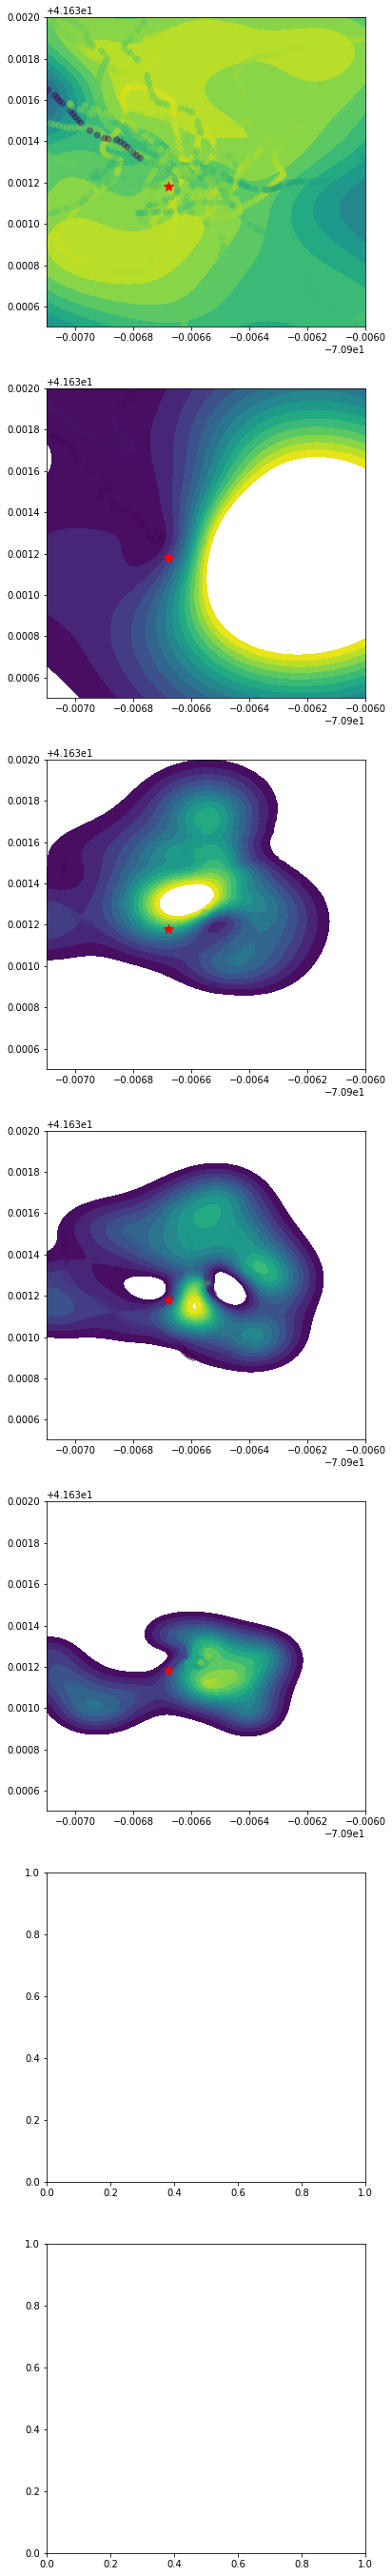

In [569]:
temp = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
temp = temp[temp['p']['Latitude'] < 41.6320]
temp = temp[temp['p']['Latitude'] > 41.6305]
temp = temp[temp['p']['Longitude'] > -70.9071]
temp = temp[temp['p']['Longitude'] < -70.9060]
viz_gp(temp, ['gga', 'CH4_ppm_adjusted'], 1.0, 'Methane in the Cove', 'fh', 0, 100)

(1619, 2) (1619, 1)
Optimization restart 1/2, f = 36880.1008839
Optimization restart 2/2, f = 6938.64947965
  Mat52.       |                   value  |  constraints  |  priors
  variance     |      11080.584343661141  |      +ve      |        
  lengthscale  |  0.00013822222664880041  |      +ve      |        
(123, 2) (123, 1)
Optimization restart 1/2, f = 111.029122874
Optimization restart 2/2, f = 121.086175303
  Mat52.       |                  value  |  constraints  |  priors
  variance     |     1417.2208583264605  |      +ve      |        
  lengthscale  |  0.0005138169687768087  |      +ve      |        
(68, 2) (68, 1)
Optimization restart 1/2, f = 206.133018468
Optimization restart 2/2, f = 182.624167405
  Mat52.       |                  value  |  constraints  |  priors
  variance     |     1965.2900658811504  |      +ve      |        
  lengthscale  |  0.0002184198969279099  |      +ve      |        
(245, 2) (245, 1)
Optimization restart 1/2, f = 725.58136448
Optimization re

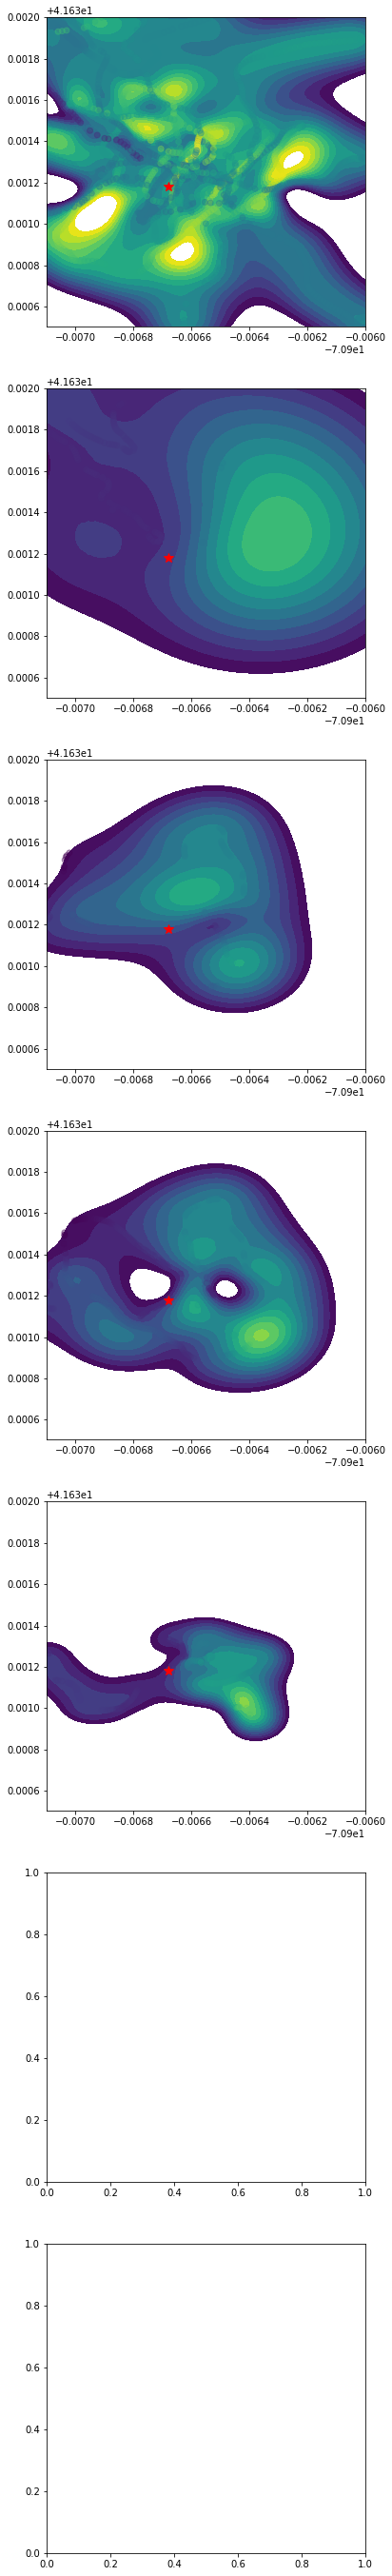

In [570]:
temp = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
temp = temp[temp['p']['Latitude'] < 41.6320]
temp = temp[temp['p']['Latitude'] > 41.6305]
temp = temp[temp['p']['Longitude'] > -70.9071]
temp = temp[temp['p']['Longitude'] < -70.9060]
viz_gp(temp, ['gga', 'CO2_ppm_adjusted'], 1.0, 'CO2 in the Cove', 'fh', 0, 100)

(1619, 2) (1619, 1)
Optimization restart 1/2, f = -57.6489559446
Optimization restart 2/2, f = 235.747914442
  rbf.         |                  value  |  constraints  |  priors
  variance     |      7.582370719686823  |      +ve      |        
  lengthscale  |  0.0001308234752749792  |      +ve      |        
(123, 2) (123, 1)
Optimization restart 1/2, f = -272.465832408
Optimization restart 2/2, f = -272.465832405
  rbf.         |                value  |  constraints  |  priors
  variance     |     24.6895504431175  |      +ve      |        
  lengthscale  |  0.06790603984592002  |      +ve      |        
(68, 2) (68, 1)
Optimization restart 1/2, f = -121.273821454
Optimization restart 2/2, f = -121.273821426
  rbf.         |                 value  |  constraints  |  priors
  variance     |     17.15628867686951  |      +ve      |        
  lengthscale  |  0.004203114114316146  |      +ve      |        
(245, 2) (245, 1)
Optimization restart 1/2, f = -488.27070008
Optimization restart 

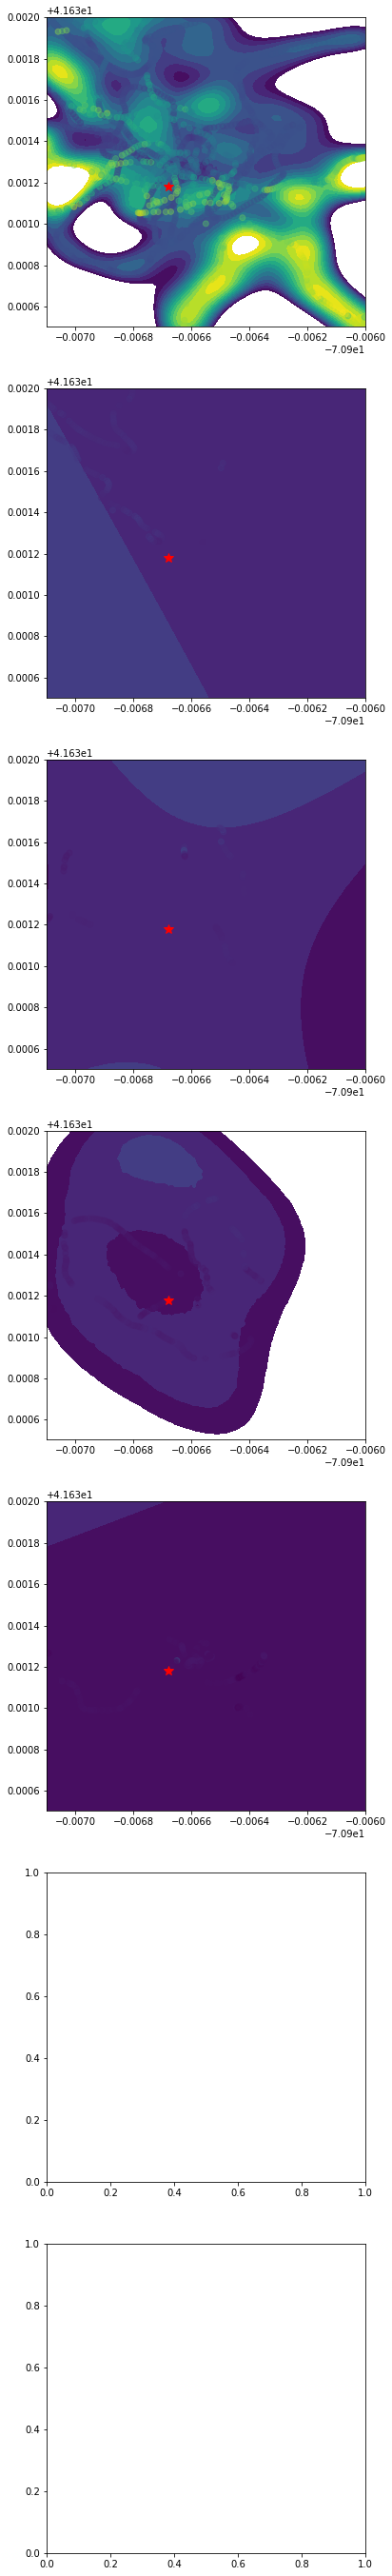

In [516]:
temp = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
temp = temp[temp['p']['Latitude'] < 41.6320]
temp = temp[temp['p']['Latitude'] > 41.6305]
temp = temp[temp['p']['Longitude'] > -70.9071]
temp = temp[temp['p']['Longitude'] < -70.9060]
viz_gp(temp, ['ctd', 'Temperature'], 1.0, 'Temperature in the Cove', 'fh', 0, 100)

(1619, 2) (1619, 1)
Optimization restart 1/2, f = 753.68490722
Optimization restart 2/2, f = 754.290212653
  rbf.         |                value  |  constraints  |  priors
  variance     |   1028.6482009265703  |      +ve      |        
  lengthscale  |  0.13911722869449397  |      +ve      |        
(123, 2) (123, 1)
Optimization restart 1/2, f = -245.424864746
Optimization restart 2/2, f = -245.424864717
  rbf.         |               value  |  constraints  |  priors
  variance     |   863.1279649166364  |      +ve      |        
  lengthscale  |  1.2799874444179475  |      +ve      |        
(68, 2) (68, 1)
Optimization restart 1/2, f = 49.5374709585
Optimization restart 2/2, f = 49.5374878785
  rbf.         |              value  |  constraints  |  priors
  variance     |  863.7849710868903  |      +ve      |        
  lengthscale  |  90.08956578427386  |      +ve      |        
(245, 2) (245, 1)
Optimization restart 1/2, f = 150.188348468
Optimization restart 2/2, f = 74.0466324212

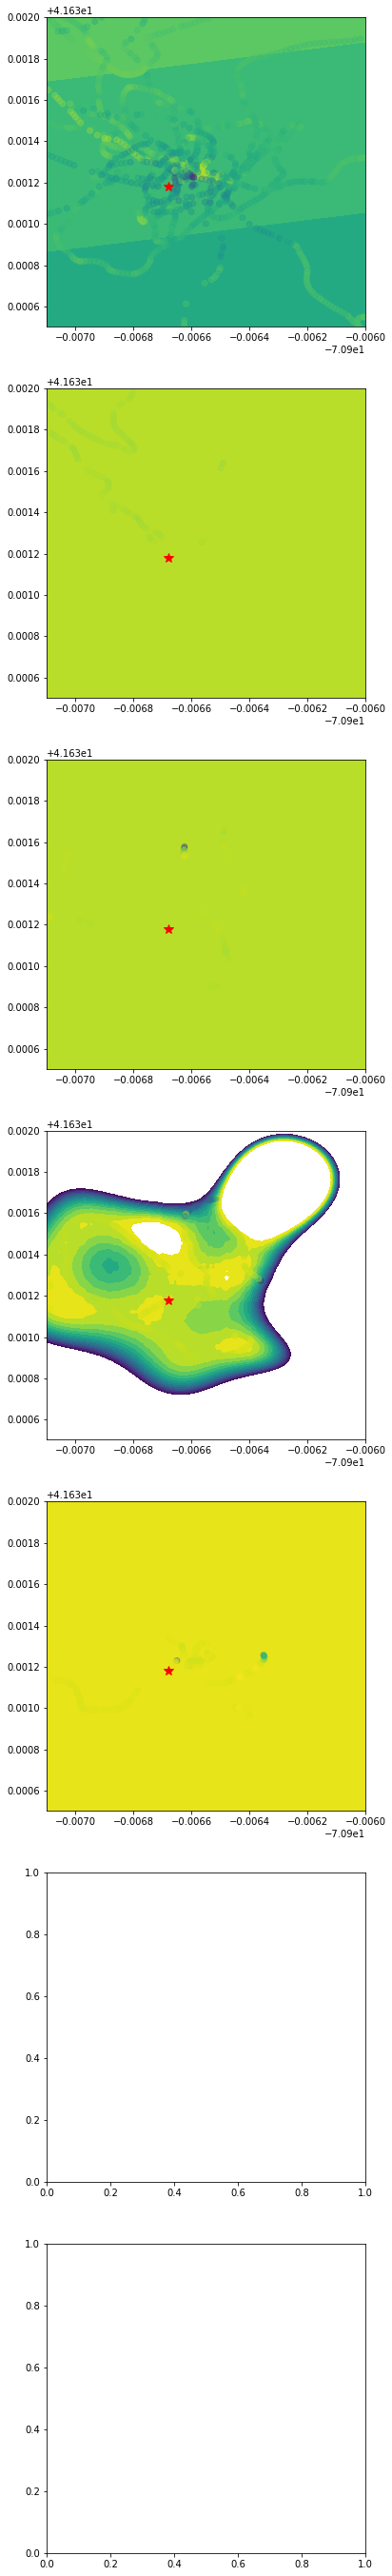

In [524]:
temp = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
temp = temp[temp['p']['Latitude'] < 41.6320]
temp = temp[temp['p']['Latitude'] > 41.6305]
temp = temp[temp['p']['Longitude'] > -70.9071]
temp = temp[temp['p']['Longitude'] < -70.9060]
temp = temp[temp['ctd']['Salinity'] > 26]
viz_gp(temp, ['ctd', 'Salinity'], 1.0, 'Salinity in the Cove', 'fh', 0, 100)

(1619, 2) (1619, 1)
Optimization restart 1/2, f = 942.277739774
Optimization restart 2/2, f = 967.07254541
  rbf.         |                  value  |  constraints  |  priors
  variance     |     218.51745690493564  |      +ve      |        
  lengthscale  |  0.0035671129652720597  |      +ve      |        
(123, 2) (123, 1)
Optimization restart 1/2, f = 61.8948351467
Optimization restart 2/2, f = 61.8948351467
  rbf.         |                 value  |  constraints  |  priors
  variance     |     344.1129089583228  |      +ve      |        
  lengthscale  |  0.023276658712806503  |      +ve      |        
(68, 2) (68, 1)
Optimization restart 1/2, f = 31.8713868593
Optimization restart 2/2, f = 31.8713868621
  rbf.         |                value  |  constraints  |  priors
  variance     |    358.8046753454001  |      +ve      |        
  lengthscale  |  0.03228394951379034  |      +ve      |        
(245, 2) (245, 1)
Optimization restart 1/2, f = 126.152518212
Optimization restart 2/2, f

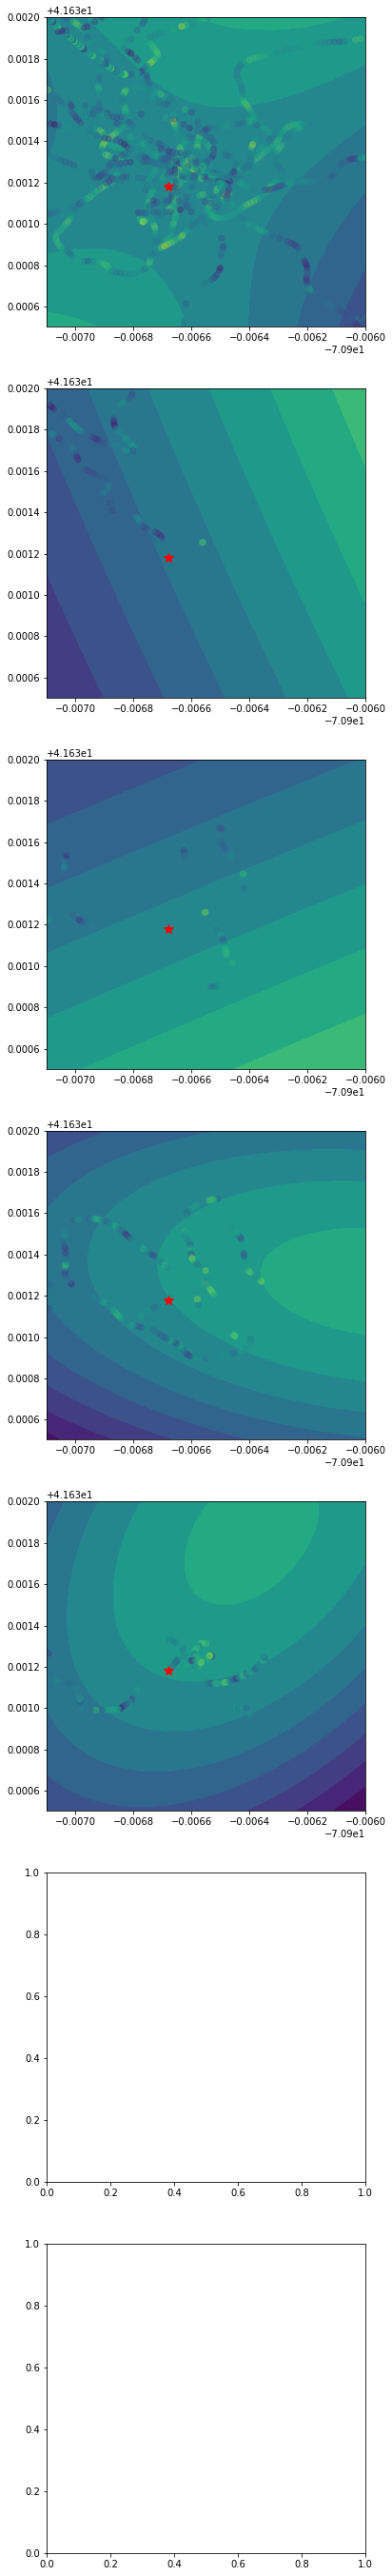

In [525]:
temp = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
temp = temp[temp['p']['Latitude'] < 41.6320]
temp = temp[temp['p']['Latitude'] > 41.6305]
temp = temp[temp['p']['Longitude'] > -70.9071]
temp = temp[temp['p']['Longitude'] < -70.9060]
viz_gp(temp, ['nit', '0.00'], 1.0, 'Nitrate in the Cove', 'fh', 0, 100)

(1573, 2) (1573, 1)
Optimization restart 1/2, f = 5231.42836161
Optimization restart 2/2, f = 5732.76801459
  rbf.         |               value  |  constraints  |  priors
  variance     |  273232.91499597963  |      +ve      |        
  lengthscale  |  0.1229844376573198  |      +ve      |        
(122, 2) (122, 1)
Optimization restart 1/2, f = 236.463046602
Optimization restart 2/2, f = 220.210402347
  rbf.         |                  value  |  constraints  |  priors
  variance     |     32103.829638500632  |      +ve      |        
  lengthscale  |  0.0006895361686328736  |      +ve      |        
(75, 2) (75, 1)
Optimization restart 1/2, f = 268.10433789
Optimization restart 2/2, f = 242.317148369
  rbf.         |                value  |  constraints  |  priors
  variance     |   202447.15391805713  |      +ve      |        
  lengthscale  |  0.02788129250845781  |      +ve      |        
(267, 2) (267, 1)
Optimization restart 1/2, f = 817.364311147
Optimization restart 2/2, f = 627

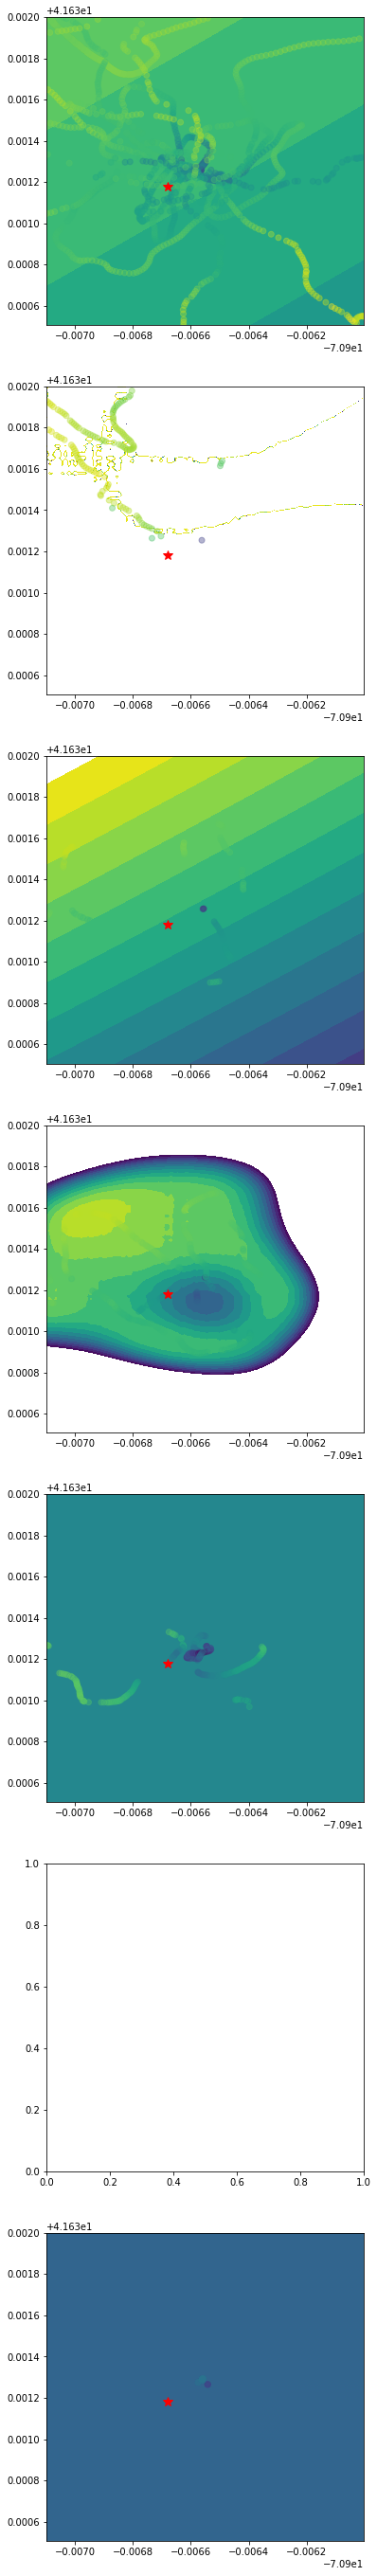

In [559]:
temp = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
temp = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Latitude']).dropna().index]
temp = temp[temp['p']['Latitude'] < 41.6320]
temp = temp[temp['p']['Latitude'] > 41.6305]
temp = temp[temp['p']['Longitude'] > -70.9071]
temp = temp[temp['p']['Longitude'] < -70.9060]

# temp = temp[temp['ctd']['Depth'] < 0.7]
# temp = temp[temp['ctd']['Depth'] >= 0.5]
# plt.plot(temp['ctd']['Depth'].values)
# temp = temp.loc[temp['op'].dropna(subset=['O2Concentration']).index]
# plt.plot(temp['op']['O2Concentration'].values)

viz_gp(temp, ['op', 'O2Concentration'], 1.0, 'O2 in the Cove', 'fh', 0, 100)

(1458, 2) (1458, 1)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   1.641554e+03           nan 
    03s37  0017   8.463142e+02   1.047520e+02 
    04s90  0025   8.442638e+02   5.483262e-08 
Runtime:     04s90
Optimization status: Converged

Optimization restart 1/2, f = 844.263849628
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s19  0001   1.340213e+03   2.706961e+04 
    03s68  0019   5.633350e+03   3.383781e+07 
    07s16  0037   8.462089e+02   2.252335e+03 
    09s12  0047   8.442638e+02   1.127098e-07 
Runtime:     09s12
Optimization status: Converged

Optimization restart 2/2, f = 844.263849628
  rbf.         |                   value  |  constraints  |  priors
  variance     |      13.183916220318885  |      +ve      |        
  lengthscale  |  0.00041050782349503015  |      +ve      |        


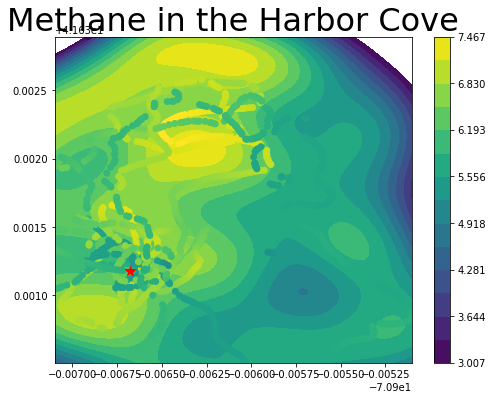

In [571]:
fh_d = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
fh_d = fh_d.loc[fh_d['gga'].dropna(subset=['CO2_ppm_adjusted']).index]
fh_d = fh_d[fh_d['p']['Latitude'] < 41.634]
fh_d = fh_d[fh_d['p']['Latitude'] > 41.6305]
fh_d = fh_d[fh_d['p']['Longitude'] > -70.9071]
fh_d = fh_d[fh_d['ctd']['Depth'] > 0.2]
fh_d = fh_d[fh_d['ctd']['Depth'] < 0.5]
fh_d = fh_d[fh_d['gga']['CH4_ppm_adjusted'] < 8.5]

xv = fh_d['p']['Longitude'][:]
yv = fh_d['p']['Latitude'][:]
z = fh_d['gga']['CH4_ppm_adjusted'][:]

ranges = [min(xv), max(xv), min(yv), max(yv)]

points = []
for x,y in zip(xv, yv):
    points.append([x,y])

xvals = np.array(points)
zvals = np.reshape(np.array(z), (len(z), 1))
print xvals.shape, zvals.shape

kern = GPy.kern.RBF(input_dim = 2, lengthscale=0.001, variance=np.var(z))
mod = GPy.models.GPRegression(xvals, zvals, kern)
mod.initialize_parameter()
mod.optimize_restarts(num_restarts = 2, messages = True)
print kern

xc = np.linspace(ranges[0], ranges[1], 100)
yc = np.linspace(ranges[2], ranges[3], 100)
xc, yc = np.meshgrid(xc, yc, sparse = False, indexing= 'xy')
data = np.vstack([xc.ravel(), yc.ravel()]).T
obs, var = mod.predict(data, full_cov=False, include_likelihood=True)

fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Methane in the Harbor Cove')     
plot = ax2.contourf(xc, yc, obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
ax2.scatter(xv, yv, c=z, cmap='viridis', vmin=min(z), vmax=max(z))
ax2.plot(-70.90668, 41.63118, 'r*', markersize=10)
cbar = fig2.colorbar(plot)

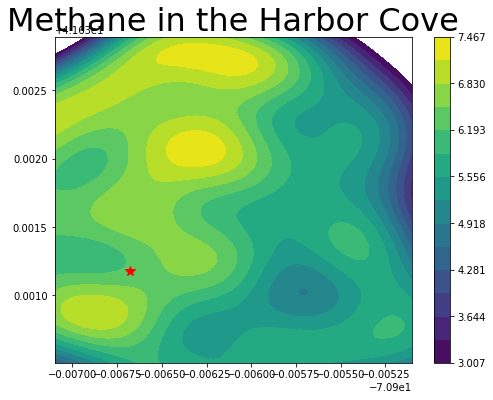

In [572]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Methane in the Harbor Cove')     
plot = ax2.contourf(xc, yc, obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
ax2.plot(-70.90668, 41.63118, 'r*', markersize=10)
cbar = fig2.colorbar(plot)

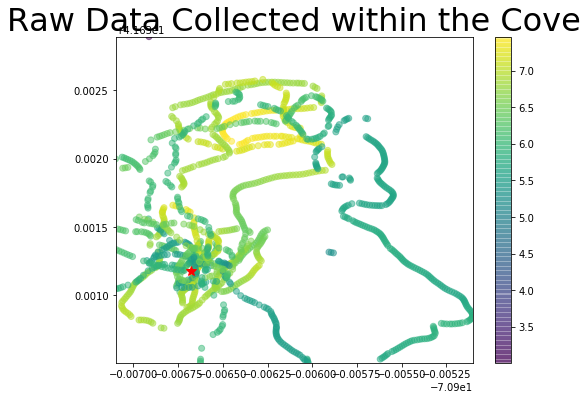

In [573]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Raw Data Collected within the Cove')     
scat = ax2.scatter(xv, yv, c=z, cmap='viridis', vmin=min(z), vmax=max(z), alpha=0.5)
ax2.plot(-70.90668, 41.63118, 'r*', markersize=10)
cbar = fig2.colorbar(scat)

(592, 2) (592, 1)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s06  0002   4.362136e+02   3.258307e+04 
    00s18  0006   1.379631e+02   1.189721e+05 
    00s68  0025  -1.955112e+02   3.177184e-10 
Runtime:     00s68
Optimization status: Converged

Optimization restart 1/2, f = -195.511188371
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s18  0005   3.427198e+04   1.090884e+09 
    01s72  0056  -1.632543e+02   8.126529e+01 
Runtime:     01s72
Optimization status: Converged

Optimization restart 2/2, f = -163.254342209
  rbf.         |                  value  |  constraints  |  priors
  variance     |      1.452724763929527  |      +ve      |        
  lengthscale  |  0.0002948312072807261  |      +ve      |        


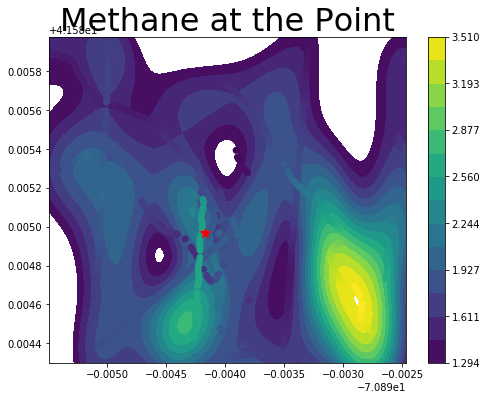

In [51]:
nb_d = nb_df.loc[nb_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
nb_d = nb_d.loc[nb_d['gga'].dropna(subset=['CO2_ppm_adjusted']).index]
nb_d = nb_d[nb_d['p']['Latitude'] < 41.586]
# nb_d = nb_d[nb_d['p']['Latitude'] > 41.6305]
nb_d = nb_d[nb_d['p']['Longitude'] > -70.8955]
nb_d = nb_d[nb_d['ctd']['Depth'] > 0.2]
nb_d = nb_d[nb_d['ctd']['Depth'] < 0.5]
nb_d = nb_d[nb_d['ctd']['Salinity'] > 0.5]

xv = nb_d['p']['Longitude'][:]
yv = nb_d['p']['Latitude'][:]
z = nb_d['gga']['CH4_ppm_adjusted'][:]

ranges = [min(xv), max(xv), min(yv), max(yv)]

points = []
for x,y in zip(xv, yv):
    points.append([x,y])

xvals = np.array(points)
zvals = np.reshape(np.array(z), (len(z), 1))
print xvals.shape, zvals.shape

kern = GPy.kern.RBF(input_dim = 2, lengthscale=0.001, variance=np.var(z))
mod = GPy.models.GPRegression(xvals, zvals, kern)
mod.initialize_parameter()
mod.optimize_restarts(num_restarts = 2, messages = True)
print kern

xc = np.linspace(ranges[0], ranges[1], 100)
yc = np.linspace(ranges[2], ranges[3], 100)
xc, yc = np.meshgrid(xc, yc, sparse = False, indexing= 'xy')
data = np.vstack([xc.ravel(), yc.ravel()]).T
obs, var = mod.predict(data, full_cov=False, include_likelihood=True)

fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Methane at the Point')     
plot = ax2.contourf(xc, yc, obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
ax2.scatter(xv, yv, c=z, cmap='viridis', vmin=min(z), vmax=max(z))
ax2.plot(-70.89417, 41.58497, 'r*', markersize=10)
cbar = fig2.colorbar(plot)

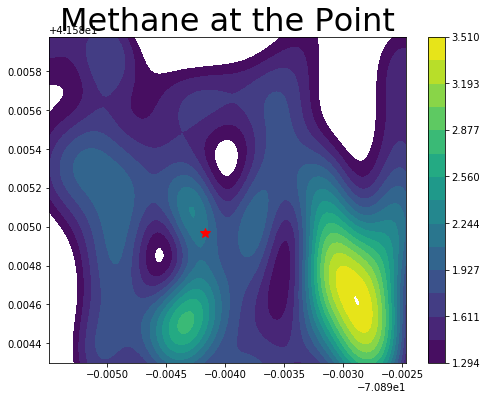

In [52]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Methane at the Point')     
plot = ax2.contourf(xc, yc, obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
ax2.plot(-70.89417, 41.58497, 'r*', markersize=10)
cbar = fig2.colorbar(plot)

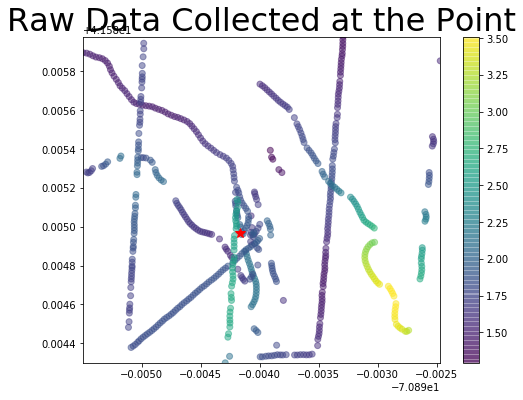

In [53]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Raw Data Collected at the Point')     
scat = ax2.scatter(xv, yv, c=z, cmap='viridis', vmin=min(z), vmax=max(z), alpha=0.5)
ax2.plot(-70.89417, 41.58497, 'r*', markersize=10)
cbar = fig2.colorbar(scat)

## Property vs Property
Now, let's plot different quantities against each other as a sanity check for correlation. 

Text(0.5,1,u'Salinity and Temperature in the Harbor')

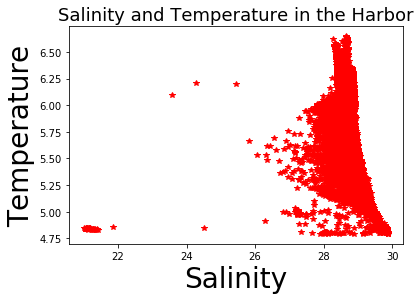

In [4]:
# Salinity and Temperature
fh_df = fh_df[fh_df['ctd']['Salinity'] > 0.5]
plt.plot(fh_df['ctd']['Salinity'], fh_df['ctd']['Temperature'], 'r*')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.title('Salinity and Temperature in the Harbor', fontsize=18)

Text(0.5,1,u'Salinity and Temperature at the Point')

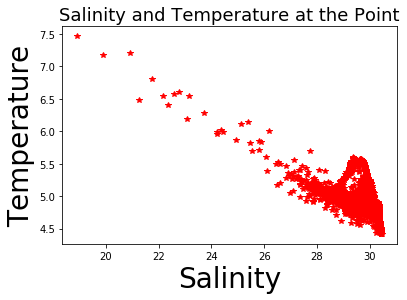

In [5]:
nb_df = nb_df[nb_df['ctd']['Salinity'] > 0.5]
plt.plot(nb_df['ctd']['Salinity'], nb_df['ctd']['Temperature'], 'r*')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.title('Salinity and Temperature at the Point', fontsize=18)

Text(0.5,1,u'Salinity and Methane in the Harbor')

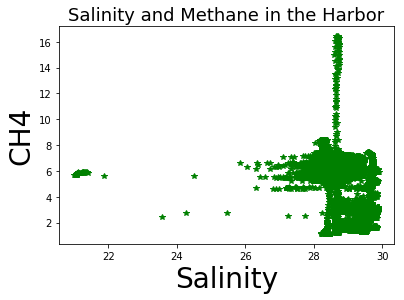

In [6]:
# Salinity and CH4
fh_df = fh_df[fh_df['ctd']['Salinity'] > 0.5]
plt.plot(fh_df['ctd']['Salinity'], fh_df['gga']['CH4_ppm_adjusted'], 'g*')
plt.xlabel('Salinity')
plt.ylabel('CH4')
plt.title('Salinity and Methane in the Harbor', fontsize=18)

Text(0.5,1,u'Salinity and Methane at the Point')

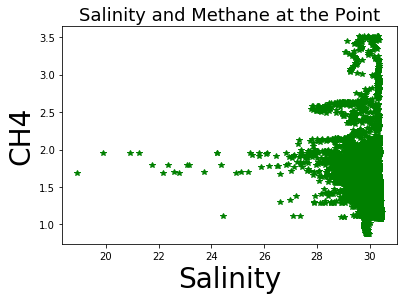

In [7]:
nb_df = nb_df[nb_df['ctd']['Salinity'] > 0.5]
plt.plot(nb_df['ctd']['Salinity'], nb_df['gga']['CH4_ppm_adjusted'], 'g*')
plt.xlabel('Salinity')
plt.ylabel('CH4')
plt.title('Salinity and Methane at the Point', fontsize=18)

Text(0.5,1,u'Salinity and CO2 in the Harbor')

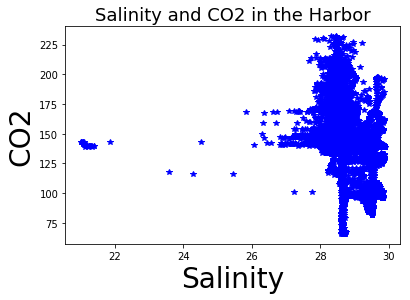

In [8]:
# Salinity and CO2
fh_df = fh_df[fh_df['ctd']['Salinity'] > 0.5]
plt.plot(fh_df['ctd']['Salinity'], fh_df['gga']['CO2_ppm_adjusted'], 'b*')
plt.xlabel('Salinity')
plt.ylabel('CO2')
plt.title('Salinity and CO2 in the Harbor', fontsize=18)

Text(0.5,1,u'Salinity and CO2 at the Point')

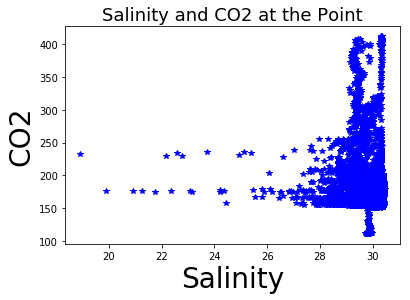

In [9]:
plt.plot(nb_df['ctd']['Salinity'], nb_df['gga']['CO2_ppm_adjusted'], 'b*')
plt.xlabel('Salinity')
plt.ylabel('CO2')
plt.title('Salinity and CO2 at the Point', fontsize=18)

Text(0.5,1,u'Salinity and O2 in the Harbor')

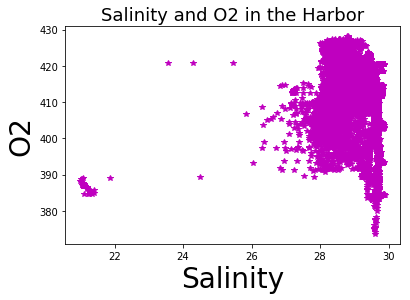

In [10]:
# Salinity and O2
plt.plot(fh_df['ctd']['Salinity'], fh_df['op']['O2Concentration'], 'm*')
plt.xlabel('Salinity')
plt.ylabel('O2')
plt.title('Salinity and O2 in the Harbor', fontsize=18)

Text(0.5,1,u'Salinity and O2 at the Point')

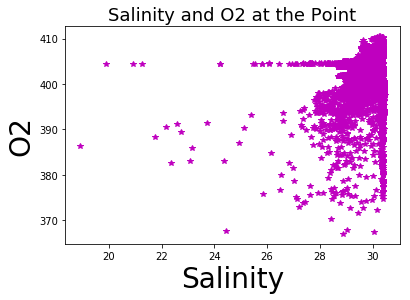

In [11]:
plt.plot(nb_df['ctd']['Salinity'], nb_df['op']['O2Concentration'], 'm*')
plt.xlabel('Salinity')
plt.ylabel('O2')
plt.title('Salinity and O2 at the Point', fontsize=18)

Text(0.5,1,u'Salinity and Nitrate in the Harbor')

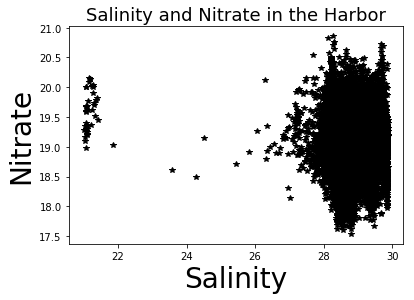

In [12]:
# Salinity and nitrate
plt.plot(fh_df['ctd']['Salinity'], fh_df['nit']['0.00'], 'k*')
plt.xlabel('Salinity')
plt.ylabel('Nitrate')
plt.title('Salinity and Nitrate in the Harbor', fontsize=18)

Text(0.5,1,u'Salinity and Nitrate at the Point')

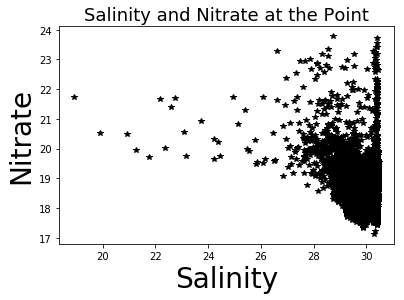

In [13]:
plt.plot(nb_df['ctd']['Salinity'], nb_df['nit']['0.00'], 'k*')
plt.xlabel('Salinity')
plt.ylabel('Nitrate')
plt.title('Salinity and Nitrate at the Point', fontsize=18)

Text(0.5,1,u'Temperature and Methane in the Harbor')

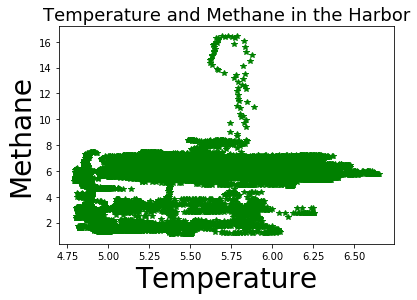

In [14]:
# Temperature and Methane
plt.plot(fh_df['ctd']['Temperature'], fh_df['gga']['CH4_ppm_adjusted'], 'g*')
plt.xlabel('Temperature')
plt.ylabel('Methane')
plt.title('Temperature and Methane in the Harbor', fontsize=18)

Text(0.5,1,u'Temperature and Methane at the Point')

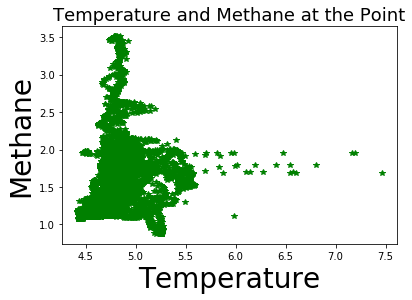

In [15]:
plt.plot(nb_df['ctd']['Temperature'], nb_df['gga']['CH4_ppm_adjusted'], 'g*')
plt.xlabel('Temperature')
plt.ylabel('Methane')
plt.title('Temperature and Methane at the Point', fontsize=18)

Text(0.5,1,u'Temperature and CO2 in the Harbor')

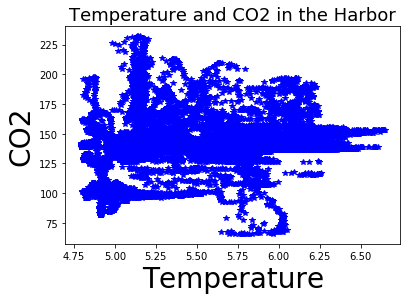

In [16]:
# Temperature and CO2
plt.plot(fh_df['ctd']['Temperature'], fh_df['gga']['CO2_ppm_adjusted'], 'b*')
plt.xlabel('Temperature')
plt.ylabel('CO2')
plt.title('Temperature and CO2 in the Harbor', fontsize=18)

Text(0.5,1,u'Temperature and CO2 at the Point')

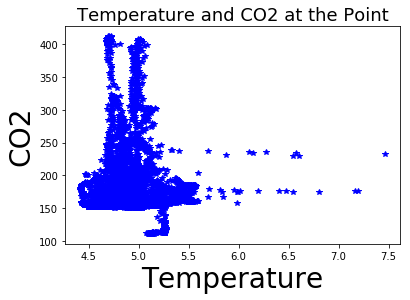

In [17]:
plt.plot(nb_df['ctd']['Temperature'], nb_df['gga']['CO2_ppm_adjusted'], 'b*')
plt.xlabel('Temperature')
plt.ylabel('CO2')
plt.title('Temperature and CO2 at the Point', fontsize=18)

Text(0.5,1,u'Temperature and O2 in the Harbor')

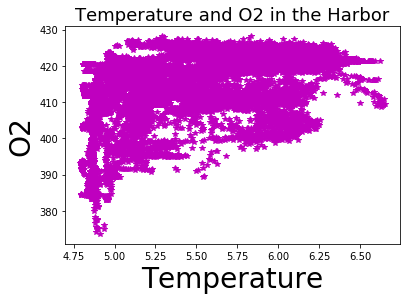

In [18]:
# Temperature and O2
plt.plot(fh_df['ctd']['Temperature'], fh_df['op']['O2Concentration'], 'm*')
plt.xlabel('Temperature')
plt.ylabel('O2')
plt.title('Temperature and O2 in the Harbor', fontsize=18)

Text(0.5,1,u'Temperature and O2 at the Point')

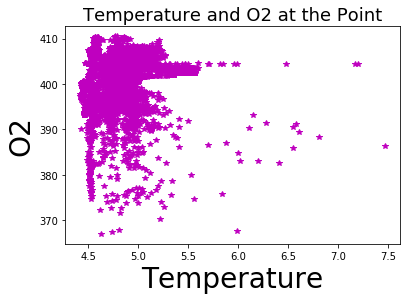

In [19]:
plt.plot(nb_df['ctd']['Temperature'], nb_df['op']['O2Concentration'], 'm*')
plt.xlabel('Temperature')
plt.ylabel('O2')
plt.title('Temperature and O2 at the Point', fontsize=18)

Text(0.5,1,u'Temperature and Nitrate in the Harbor')

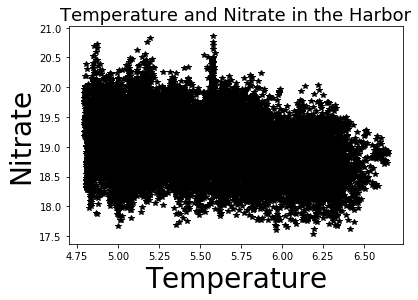

In [20]:
# Temperature and Nitrate
plt.plot(fh_df['ctd']['Temperature'], fh_df['nit']['0.00'], 'k*')
plt.xlabel('Temperature')
plt.ylabel('Nitrate')
plt.title('Temperature and Nitrate in the Harbor', fontsize=18)

Text(0.5,1,u'Temperature and Nitrate at the Point')

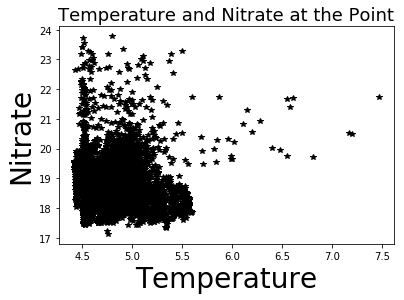

In [21]:
plt.plot(nb_df['ctd']['Temperature'], nb_df['nit']['0.00'], 'k*')
plt.xlabel('Temperature')
plt.ylabel('Nitrate')
plt.title('Temperature and Nitrate at the Point', fontsize=18)

Text(0.5,1,u'Methane and CO2 in the Harbor')

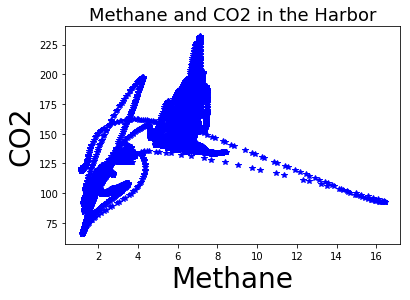

In [22]:
# Methane and CO2
plt.plot(fh_df['gga']['CH4_ppm_adjusted'], fh_df['gga']['CO2_ppm_adjusted'], 'b*')
plt.xlabel('Methane')
plt.ylabel('CO2')
plt.title('Methane and CO2 in the Harbor', fontsize=18)

Text(0.5,1,u'Methane and CO2 at the Point')

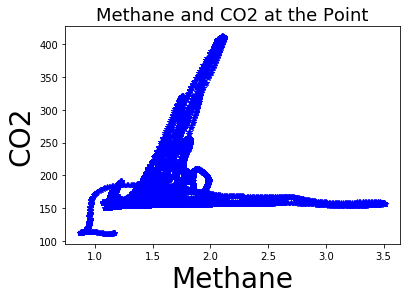

In [23]:
plt.plot(nb_df['gga']['CH4_ppm_adjusted'], nb_df['gga']['CO2_ppm_adjusted'], 'b*')
plt.xlabel('Methane')
plt.ylabel('CO2')
plt.title('Methane and CO2 at the Point', fontsize=18)

Text(0.5,1,u'Methane and O2 in the Harbor')

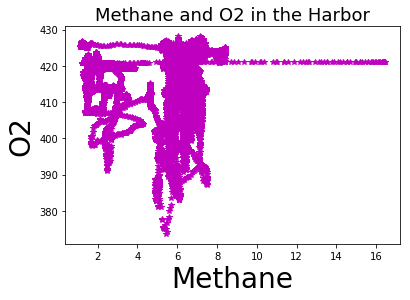

In [24]:
# Methane and O2
plt.plot(fh_df['gga']['CH4_ppm_adjusted'], fh_df['op']['O2Concentration'], 'm*')
plt.xlabel('Methane')
plt.ylabel('O2')
plt.title('Methane and O2 in the Harbor', fontsize=18)

Text(0.5,1,u'Methane and O2 at the Point')

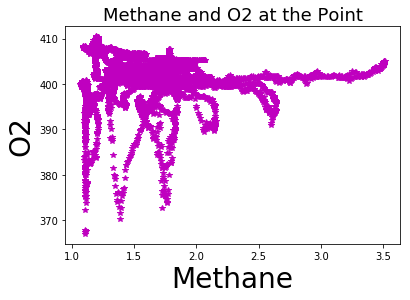

In [25]:
plt.plot(nb_df['gga']['CH4_ppm_adjusted'], nb_df['op']['O2Concentration'], 'm*')
plt.xlabel('Methane')
plt.ylabel('O2')
plt.title('Methane and O2 at the Point', fontsize=18)

Text(0.5,1,u'Methane and Nitrate in the Harbor')

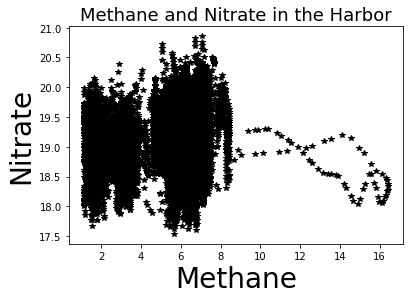

In [26]:
# Methane and Nitrate
plt.plot(fh_df['gga']['CH4_ppm_adjusted'], fh_df['nit']['0.00'], 'k*')
plt.xlabel('Methane')
plt.ylabel('Nitrate')
plt.title('Methane and Nitrate in the Harbor', fontsize=18)

Text(0.5,1,u'Methane and Nitrate at the Point')

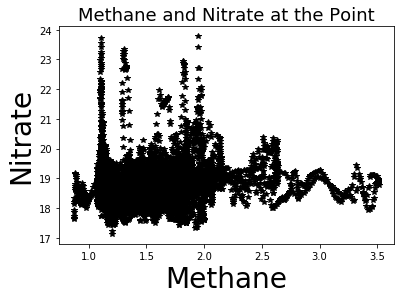

In [27]:
# Methane and Nitrate
plt.plot(nb_df['gga']['CH4_ppm_adjusted'], nb_df['nit']['0.00'], 'k*')
plt.xlabel('Methane')
plt.ylabel('Nitrate')
plt.title('Methane and Nitrate at the Point', fontsize=18)

Text(0.5,1,u'CO2 and O2 in the Harbor')

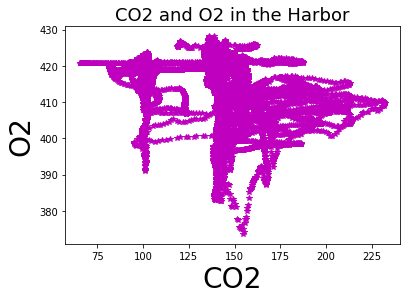

In [28]:
# CO2 and O2
plt.plot(fh_df['gga']['CO2_ppm_adjusted'], fh_df['op']['O2Concentration'], 'm*')
plt.xlabel('CO2')
plt.ylabel('O2')
plt.title('CO2 and O2 in the Harbor', fontsize=18)

Text(0.5,1,u'CO2 and O2 at the Point')

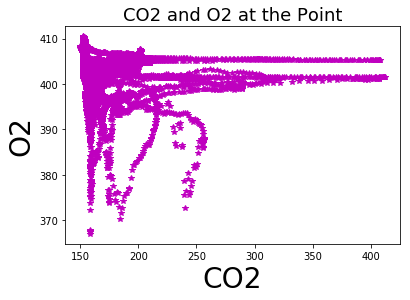

In [29]:
plt.plot(nb_df['gga']['CO2_ppm_adjusted'], nb_df['op']['O2Concentration'], 'm*')
plt.xlabel('CO2')
plt.ylabel('O2')
plt.title('CO2 and O2 at the Point', fontsize=18)

Text(0.5,1,u'CO2 and Nitrate in the Harbor')

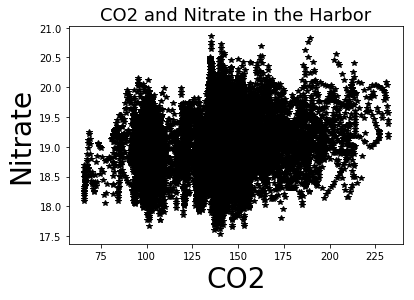

In [30]:
# CO2 and Nitrate
plt.plot(fh_df['gga']['CO2_ppm_adjusted'], fh_df['nit']['0.00'], 'k*')
plt.xlabel('CO2')
plt.ylabel('Nitrate')
plt.title('CO2 and Nitrate in the Harbor', fontsize=18)

Text(0.5,1,u'CO2 and Nitrate at the Point')

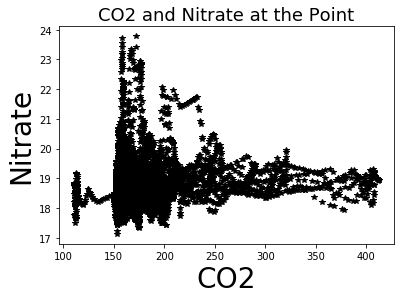

In [31]:
plt.plot(nb_df['gga']['CO2_ppm_adjusted'], nb_df['nit']['0.00'], 'k*')
plt.xlabel('CO2')
plt.ylabel('Nitrate')
plt.title('CO2 and Nitrate at the Point', fontsize=18)

Text(0.5,1,u'O2 and Nitrate in the Harbor')

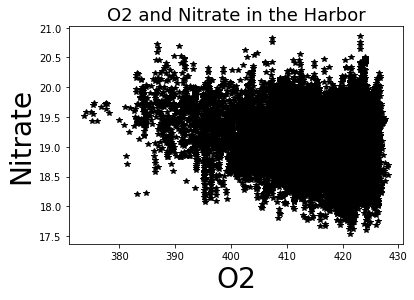

In [32]:
# O2 and Nitrate
plt.plot(fh_df['op']['O2Concentration'], fh_df['nit']['0.00'], 'k*')
plt.xlabel('O2')
plt.ylabel('Nitrate')
plt.title('O2 and Nitrate in the Harbor', fontsize=18)

Text(0.5,1,u'O2 and Nitrate at the Point')

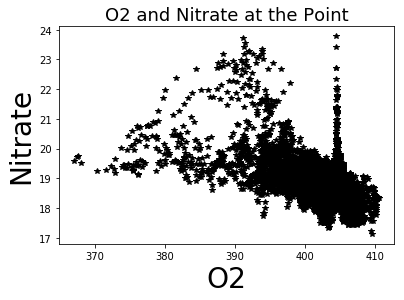

In [33]:
plt.plot(nb_df['op']['O2Concentration'], nb_df['nit']['0.00'], 'k*')
plt.xlabel('O2')
plt.ylabel('Nitrate')
plt.title('O2 and Nitrate at the Point', fontsize=18)